Testing model redbull_gt3_1703 (no fuel penalty)

C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250317_034633.066\model\best_reward

In [1]:
no_fuel_penalty_string = 'No fuel penalty'
fuel_penalty_i_string = lambda i: f'Fuel penalty {i}%'

graph_colors = {
    'baseline': 'black',
    '0p': u'#1f77b4',
    '2p': u'#17becf',
    '5p': u'#ff7f0e',
    '10p': u'#2ca02c',
    '20p': u'#d62728',
}

graph_markers = {
    'att0': 'o',
    'att1': 's',
    'att2': '^'
}


presentation_plt_params = {
    'figsize_x': 24,
    'figsize_y': 12,
    'axes.titlesize': 28,
    'axes.labelsize': 18,
    'ticks.labelsize': 12,
    'legend.markerscale': 1,
    'legend.fontsize': 14,
}

testing_infos = {
    # 'redbull_gt3_1703': {
    #     'model_tested': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250317_034633.066\model\best_reward',
    #     'fuel_penalty': fuel_penalty_i_string(0),
    #     'graph_color': graph_colors['0p'],
    #     'track': 'redbull',
    #     'car': 'BMW Z4 GT3',
    #     'attempts': [
    #         {
    #             'eval_summary': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250331_212728.659\eval_summary.csv",
    #             'laps': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250331_212728.659\laps",
    #             'graph_markers': graph_markers['att0'],
    #         },
    #         {
    #             'eval_summary': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250331_215913.889\eval_summary.csv",
    #             'laps': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250331_215913.889\laps",
    #             'graph_markers': graph_markers['att1'],
    #         },
    #     ],
    # },
    # 'redbull_gt3_2603_fuel_5p': {
    #     'model_tested': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250326_053905.584\model\best_reward',
    #     'fuel_penalty': fuel_penalty_i_string(5),
    #     'graph_color': graph_colors['5p'],
    #     'track': 'redbull',
    #     'car': 'BMW Z4 GT3',
    #     'attempts': [
    #         {
    #             'eval_summary': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250401_012610.505\eval_summary.csv",
    #             'laps': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250401_012610.505\laps",
    #             'graph_markers': graph_markers['att0']
    #         }
    #     ]
    # }

    '0513_redbull_gt3_seed_1_seq_3': {
        'model_tested': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250513_222046.322\model\best_reward',
        'fuel_penalty': fuel_penalty_i_string(0),
        'graph_color': graph_colors['0p'],
        'track': 'redbull',
        'car': 'BMW Z4 GT3',
        'attempts': [
            {
                'eval_summary': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250516_174103.209\eval_summary.csv",
                'laps': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250516_174103.209\laps",
                'graph_markers': graph_markers['att0'],
            },
        ],
    },
    '0421_redbull_gt3_fuel_5p_seed_0': {
        'model_tested': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250421_134742.180\model\best_reward',
        'fuel_penalty': fuel_penalty_i_string(5),
        'graph_color': graph_colors['5p'],
        'track': 'redbull',
        'car': 'BMW Z4 GT3',
        'attempts': [
            {
                'eval_summary': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250516_180847.155\eval_summary.csv",
                'laps': r"C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250516_180847.155\laps",
                'graph_markers': graph_markers['att0']
            }
        ]
    },
    # '0509_monza_gt3_seed_2_seq_3': {
    #     'model_tested': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250509_010456.581\model\best_reward',
    #     'fuel_penalty': fuel_penalty_i_string(0),
    #     'graph_color': graph_colors['0p'],
    #     'track': 'monza',
    #     'car': 'F317',
    #     'attempts': [
    #         {
    #             'eval_summary': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250525_132936.219\eval_summary.csv',
    #             'laps': r'C:\Users\tetre\Documents\mydocs\study\sem7\thesis\assetto_corsa_gym\outputs\20250525_132936.219\laps',
    #             'graph_markers': graph_markers['att0']
    #         }
    #     ]
    # }
}

# Statistics about the experiments

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tabulate import tabulate

for testing_key, testing_info in testing_infos.items():
    print(f'STATS FOR {testing_key}')
    for i, att in enumerate(testing_info['attempts']):
        print(f'Attempt {i}:')

        # Read df
        episode_df = pd.read_csv(att['eval_summary'])

        # Find lap time and lap fuel cols
        lap_time_cols = [col for col in episode_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        lap_fuel_cols = [col for col in episode_df.columns if re.match(r'LapNo_[1-9]\d*_Fuel', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        best_lap_time = episode_df[lap_time_cols].min(axis=1)[0]
        best_lap_col = episode_df[lap_time_cols].idxmin(axis=1)[0] 
        lap_number = re.findall(r'LapNo_([0-9]+)_Time', best_lap_col)[0]
        best_fuel_col = f'LapNo_{lap_number}_Fuel'

        # Print the stats
        print(f"\tPackages lost: {episode_df['packages_lost'][0]}")
        print(f"\tEpisode reward: {episode_df['ep_reward'][0]}")
        print(f"\tBest Lap Time: {episode_df[lap_time_cols].min(axis=1)[0]}")
        print(f"\tFC for Best Lap (L): {episode_df[best_fuel_col][0] * 10}")
        print(f"\tMean Lap Time: {episode_df[lap_time_cols].mean(axis=1)[0]}")
        print(f"\tMean Fuel Consumption Per Lap: {episode_df[lap_fuel_cols].mean(axis=1)[0] * 10}")

STATS FOR 0513_redbull_gt3_seed_1_seq_3
Attempt 0:
	Packages lost: 34
	Episode reward: 5217.146412153493
	Best Lap Time: 92.964
	FC for Best Lap (L): 1.8423271179199219
	Mean Lap Time: 92.97533333333332
	Mean Fuel Consumption Per Lap: 1.8418884277343748
STATS FOR 0421_redbull_gt3_fuel_5p_seed_0
Attempt 0:
	Packages lost: 44
	Episode reward: 4927.340077182372
	Best Lap Time: 92.784
	FC for Best Lap (L): 1.64581298828125
	Mean Lap Time: 92.79566666666666
	Mean Fuel Consumption Per Lap: 1.644783020019531


In [3]:
import math
from matplotlib.collections import LineCollection
from matplotlib.patches import ArrowStyle, FancyArrowPatch, RegularPolygon
import glob
import os
from matplotlib.colors import TwoSlopeNorm

plt.rcParams['axes.titlesize'] = 24
plt.rcParams['figure.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.markerscale'] = 2.0


# Analyzing Fuel Consumption Rates

In [4]:
def no_gear_1_changes(episode_df):
    gear = episode_df['actualGear']
    next_gear_shifts = gear.shift(-1).where(gear.shift(-1).ne(gear))
    episode_df['nextGear'] = next_gear_shifts.bfill().astype('Int64')

    prev_gear_shifts = gear.shift(1).where(gear.shift(1).ne(gear))
    episode_df['prevGear'] = prev_gear_shifts.ffill().astype('Int64')

    prev_gear = episode_df['prevGear']
    next_gear = episode_df['nextGear']
    episode_df['actualGear'] = gear.where(gear.ne(1) | next_gear.eq(2), prev_gear)
    episode_df['actualGear'] = episode_df['actualGear'].astype('float64')
    return episode_df


def decrease_or_increase(metric):
    if (metric < 0):
        return 'decrease'
    else:
        return 'increase'

vmin: -0.012969970703125
vmax: 0.01306533813494326
vcenter: 0


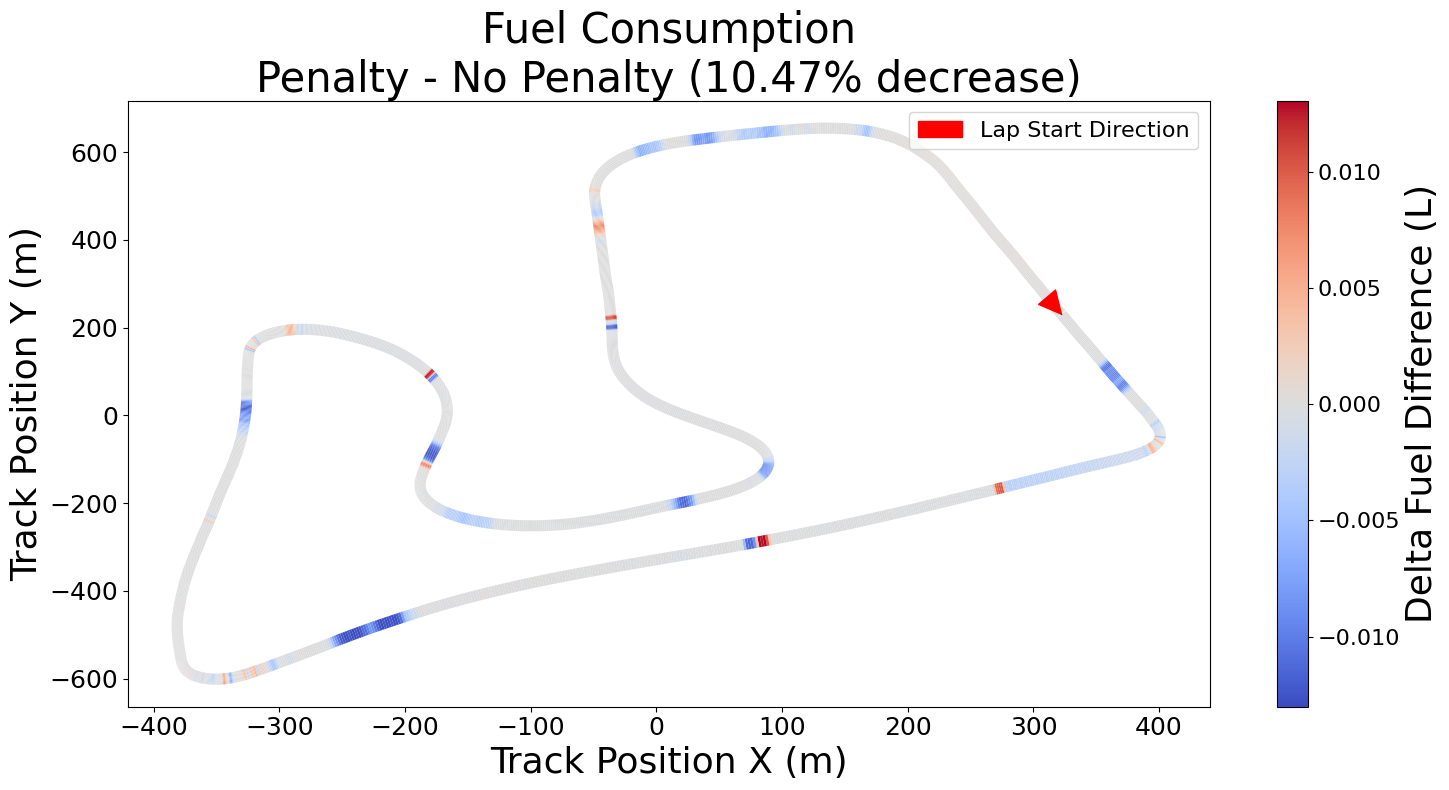

vmin: -1.0
vmax: 1.0
vcenter: 0


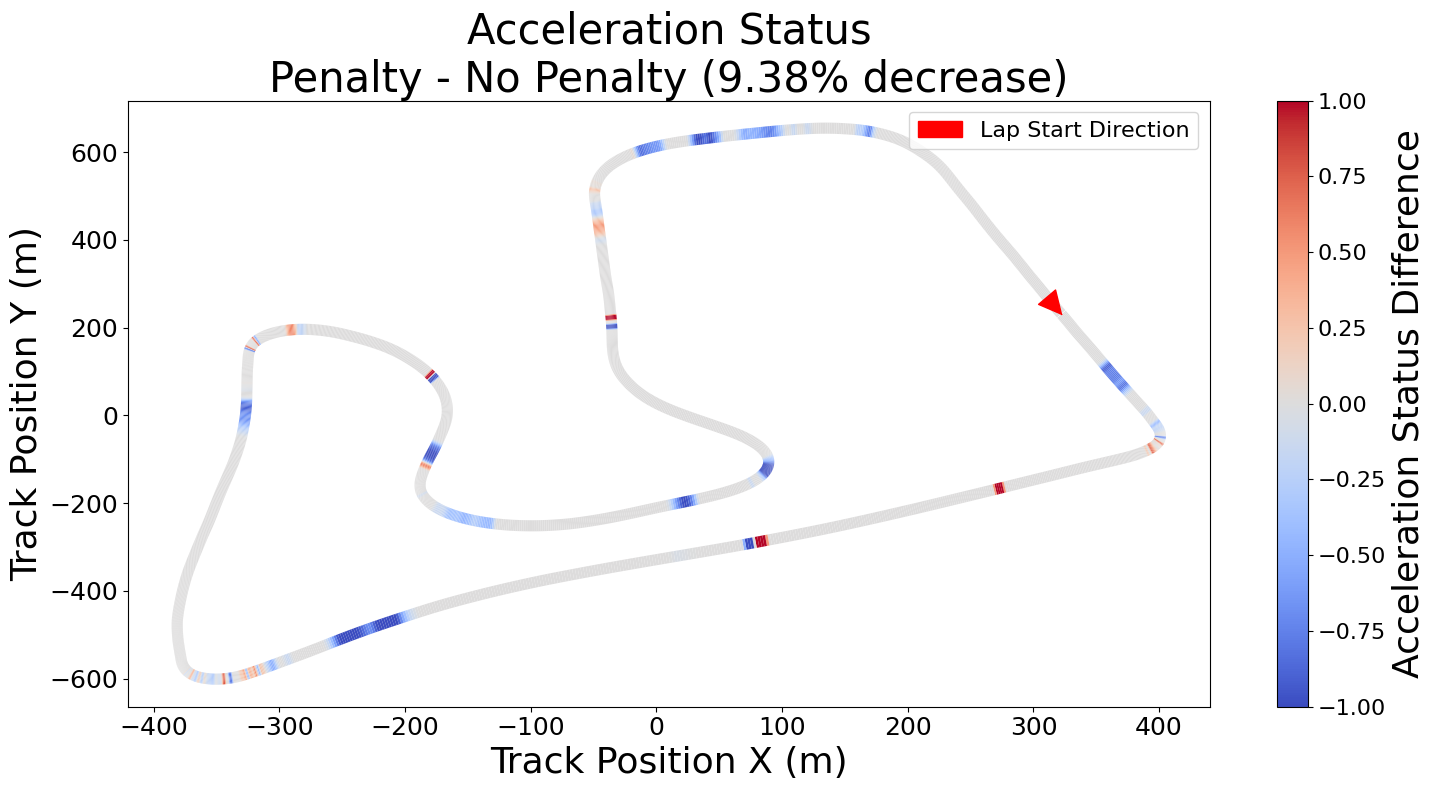

vmin: -1.0
vmax: 0.7031244856916601
vcenter: 0


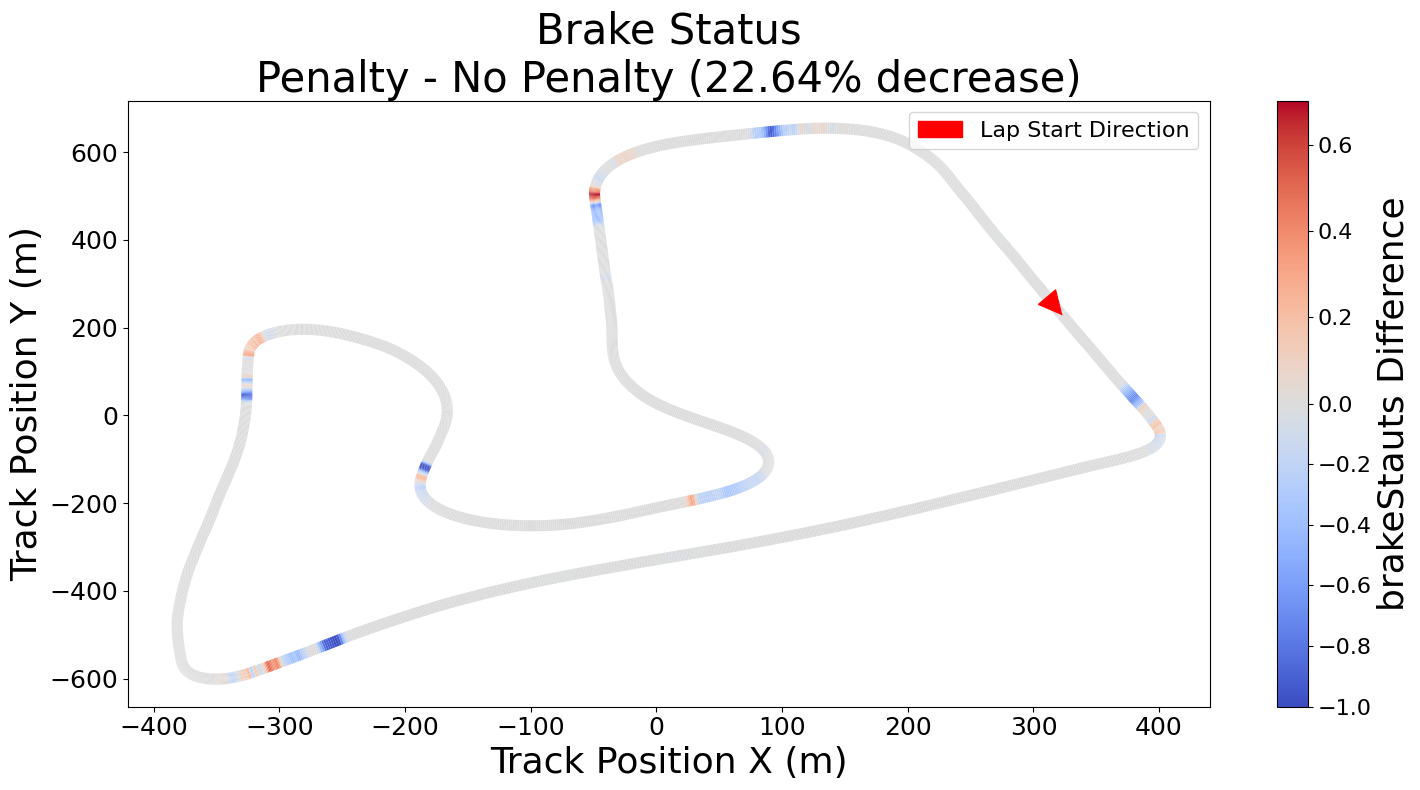

vmin: -1.0
vmax: 1.0
vcenter: 0


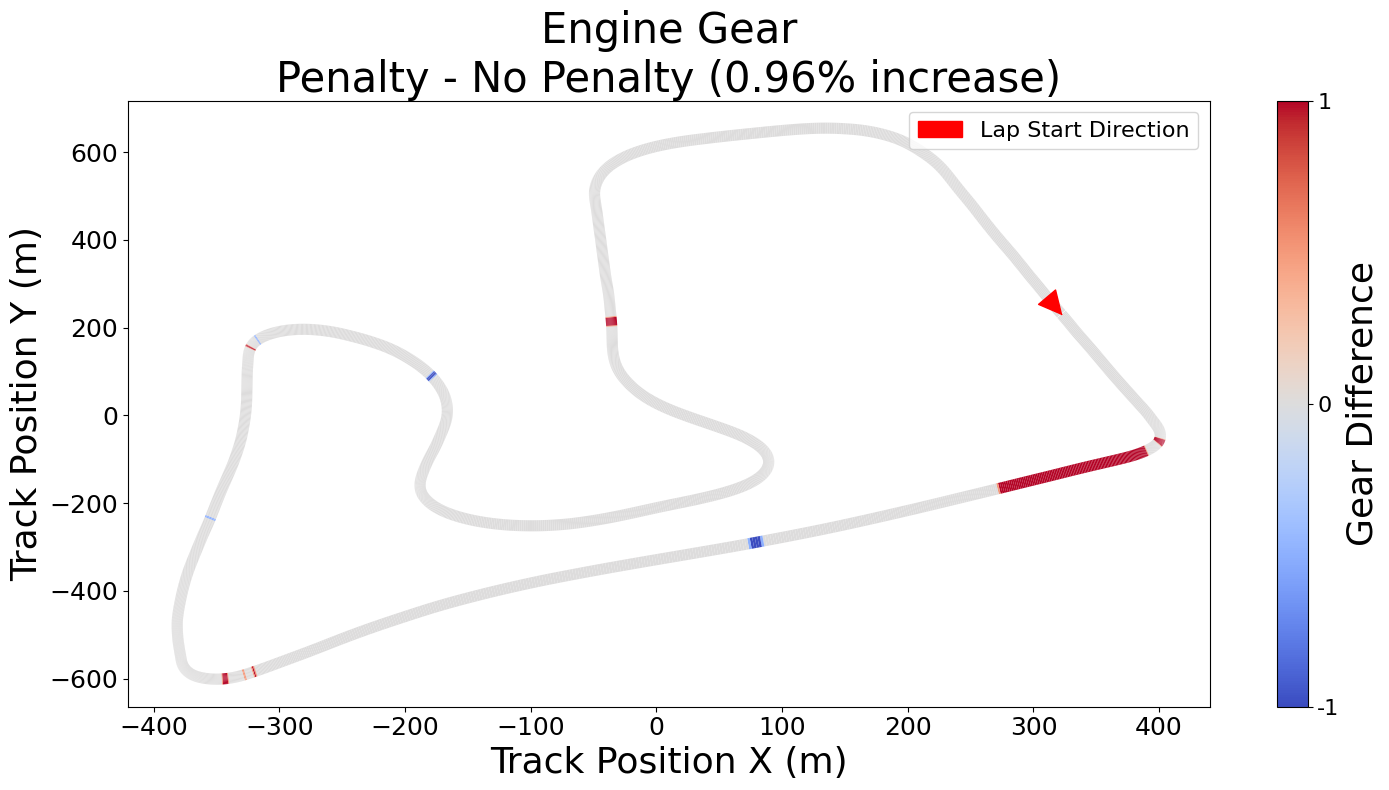

vmin: -269.21246945858
vmax: 158.62499713897705
vcenter: 0


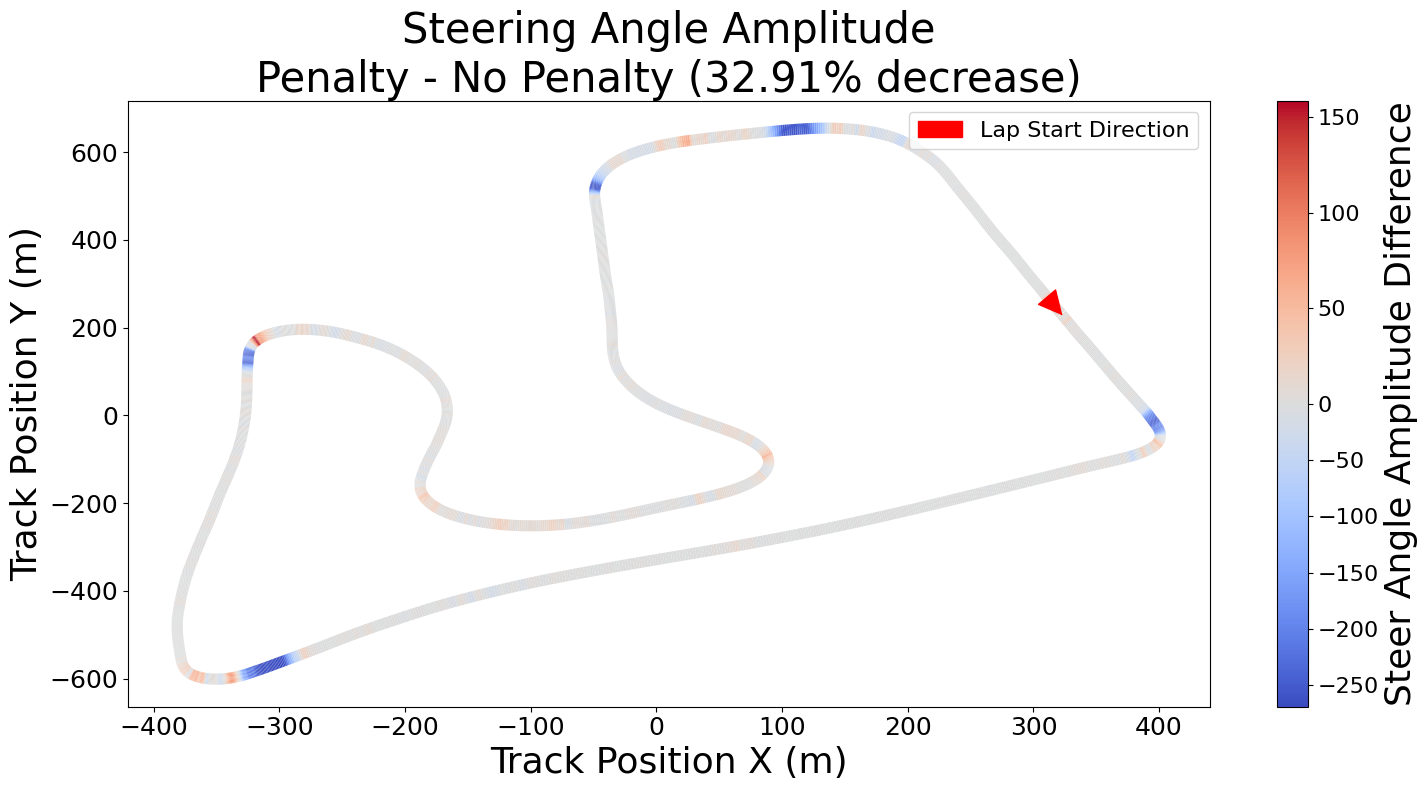

vmin: -2803.318359375
vmax: 2174.85546875
vcenter: 0


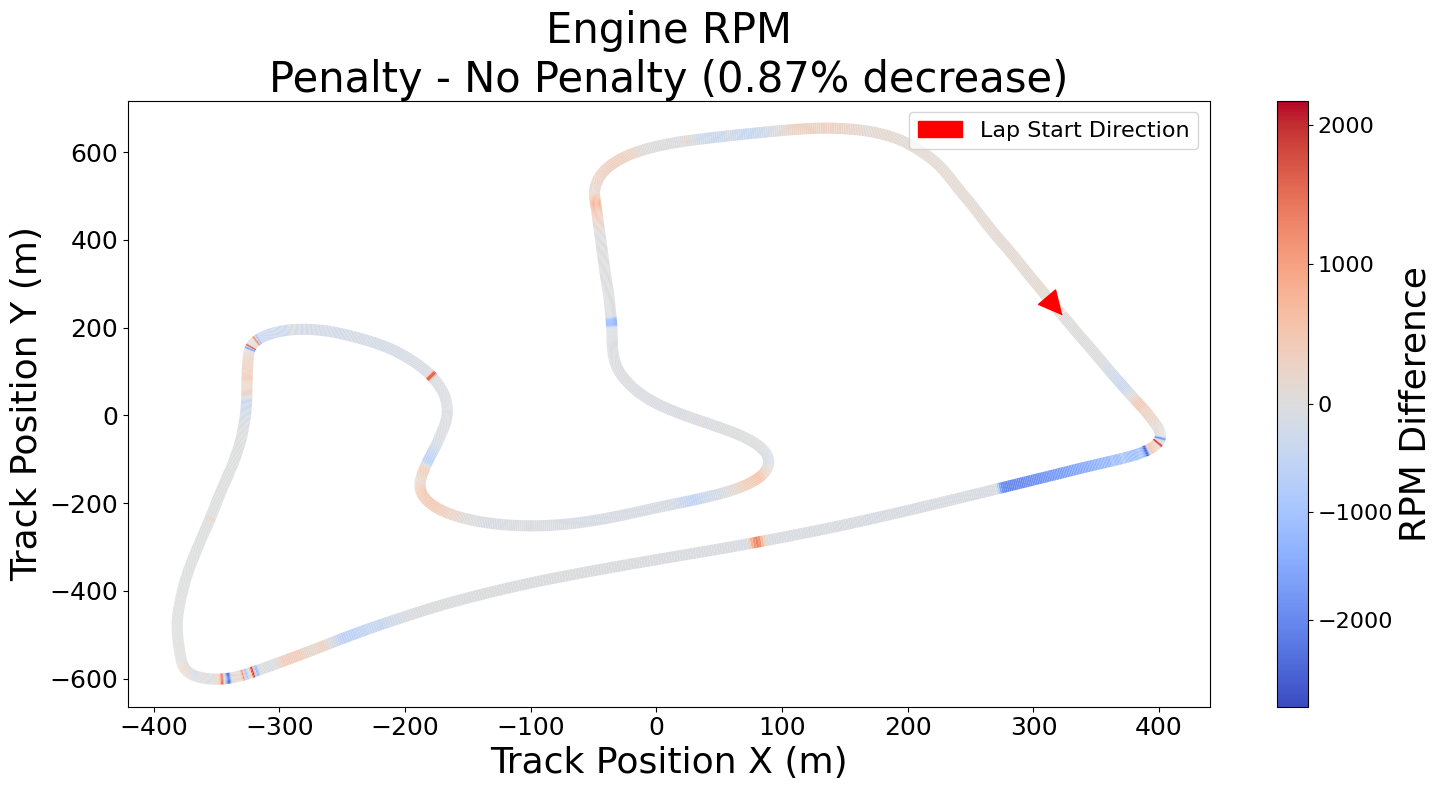

In [5]:
lap_count_reset_position_y,lap_count_reset_position_x = 230.14952087402344,322.72430419921875

def return_df_for_fastest_lap(testing_key: str) -> pd.DataFrame:
    # Find the best lap in each of summary files for the testing key
    
    # read summary df
    att = testing_infos[testing_key]['attempts'][0]
    summary_df = pd.read_csv(att['eval_summary'])

        
    # Find columns with lap times
    lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
    if not lap_time_cols:
        print(f"No lap time columns found in {testing_key}")

    # Compute the best lap time per episode (min across all lap columns)
    best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
    best_lap_index = int(best_lap_column.values[0].split('_')[1])

    # Read episode df (should be only one)
    csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
    episode_df = pd.read_csv(csv_episode_file)
    
    # Add delta_fuel
    episode_df['delta_fuel'] =  (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
    episode_df = episode_df.dropna()

    # Filter only the fastest lap
    fastest_lap_df = episode_df[episode_df['LapCount'] == best_lap_index]    

    # Get all reset points
    time_diff = fastest_lap_df['currentTime'].diff()
    reset_points = (time_diff < 0).astype(int).cumsum()

    latest_reset_lap = fastest_lap_df[reset_points == reset_points.max()]

    return latest_reset_lap

def fancy_triangle(x, y):
    # Find the index of the closest point to the lap start position
    start = (x[0], y[0])
    end = (x[1], y[1])

    style = ArrowStyle('-|>')
    lap_start_arrow = FancyArrowPatch(
        posA=start, posB=end,
        arrowstyle=style,
        mutation_scale=40,  # Larger arrow
        color='red',
        label='Lap Start Direction',
        zorder=5
    )

    lap_start_arrow.set_label('Lap Start Direction')

    return lap_start_arrow


def plot_lap_by_metric(df_1, df_2, metric_col, title, suptitle, cbar_label, is_cbar_int=False):
    '''
    will subtract df_2[metric_col] - df_1[metric_col] and build a lap that shows the difference (blue - lower, red - higher)
    '''
    x, y= df_1['world_position_x'].values, df_1['world_position_y'].values

    metric = df_2[metric_col].fillna(0).values - df_1[metric_col].fillna(0).values[:len(df_2)]

    if metric_col == 'delta_time':
        metric = df_1[metric_col]
        
    if metric_col == 'delta_fuel':
        metric *= 10
        
    # Each segment is between two points, so we take the average metric for each segment
    segment_values = (metric[:-1] + metric[1:]) / 2

    # Build segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Build the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    vmin = segment_values.min()
    vmax = segment_values.max()
    vcenter = 0


    print(f'vmin: {vmin}')
    print(f'vmax: {vmax}')
    print(f'vcenter: {vcenter}')
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    lc = LineCollection(segments, cmap='coolwarm', norm=norm)
    lc.set_array(segment_values)
    lc.set_linewidth(8)

    ax.add_collection(lc)

    metric_diff = (((df_2[metric_col].mean() - df_1[metric_col].mean()) / df_1[metric_col].mean()) * 100).round(2)
    if metric_col == 'delta_time':
        metric_diff = segment_values.values[-2].round(2)

    # Set axis labels and scaling
    ax.set_xlabel('Track Position X (m)', fontsize=26)
    ax.set_ylabel('Track Position Y (m)', fontsize=26)
    ax.set_title(f'{title} ({np.abs(metric_diff)}% {decrease_or_increase(metric_diff)})', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.autoscale()

    # Add colorbar for the custom metric
    cbar = fig.colorbar(lc, ax=ax)
    cbar.set_label(cbar_label, fontsize=26)

    if is_cbar_int:
        cbar.set_ticks(np.arange(np.floor(vmin), np.ceil(vmax) + 1))
        cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

    lap_arrow = fancy_triangle(x, y)
    ax.add_patch(lap_arrow)
    ax.legend(handles=[lap_arrow], loc='upper right', fontsize=16) 
    plt.tight_layout()
    plt.show()


df_no_penalty = return_df_for_fastest_lap('0513_redbull_gt3_seed_1_seq_3')
df_penalty = return_df_for_fastest_lap('0421_redbull_gt3_fuel_5p_seed_0')

plot_lap_by_metric(
    df_1=df_no_penalty, 
    df_2=df_penalty,
    metric_col='delta_fuel',
    title='Fuel Consumption\nPenalty - No Penalty',
    suptitle='(Blue segments - New reward saves fuel, Red segments - New reward consumes more fuel)',
    cbar_label='Delta Fuel Difference (L)')

plot_lap_by_metric(
    df_1=df_no_penalty,
    df_2=df_penalty,
    metric_col='accStatus',
    title='Acceleration Status\nPenalty - No Penalty',
    suptitle='(Blue segments - New reward accelerates less, Red segments - New reward accelerates more)',
    cbar_label='Acceleration Status Difference'
)

plot_lap_by_metric(
    df_1=df_no_penalty,
    df_2=df_penalty,
    metric_col='brakeStatus',
    title='Brake Status\nPenalty - No Penalty',
    suptitle='(Blue segments - New reward brakes less, Red segments - New reward brakes more)',
    cbar_label='brakeStauts Difference'
)

plot_lap_by_metric(
    df_1=no_gear_1_changes(df_no_penalty),
    df_2=no_gear_1_changes(df_penalty),
    metric_col='actualGear',
    title='Engine Gear\nPenalty - No Penalty',
    suptitle='(Blue segments - New reward stays in lower gear, Red segments - New reward stays in higher gear)',
    cbar_label='Gear Difference',
    is_cbar_int=True
)

df_no_penalty['steerAngleAmplitude'] = np.abs(df_no_penalty['steerAngle'])
df_penalty['steerAngleAmplitude'] = np.abs(df_penalty['steerAngle'])

plot_lap_by_metric(
    df_1=df_no_penalty,
    df_2=df_penalty,
    metric_col='steerAngleAmplitude',
    title='Steering Angle Amplitude\nPenalty - No Penalty',
    suptitle='(Blue segments - New reward steers less, Red segments - New reward steers more)',
    cbar_label='Steer Angle Amplitude Difference',
)

plot_lap_by_metric(
    df_1=df_no_penalty,
    df_2=df_penalty,
    metric_col='RPM',
    title='Engine RPM\nPenalty - No Penalty',
    suptitle='(Blue segments - New reward has lower RPM, Red segments - New reward has higher RPM)',
    cbar_label='RPM Difference',
)


vmin: -0.18112519068442623
vmax: 0.24030523885119948
vcenter: 0


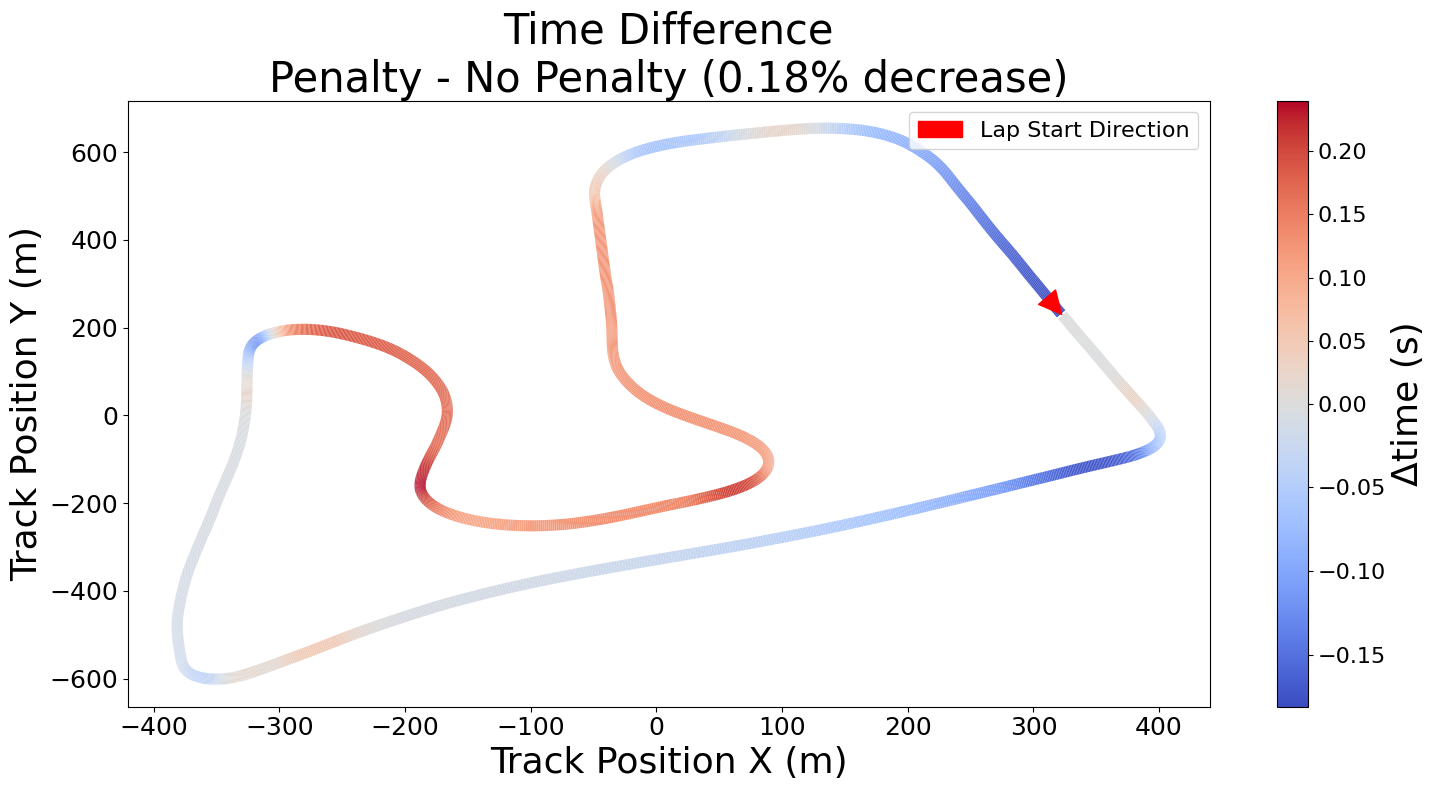

In [6]:
import numpy as np
from scipy.interpolate import interp1d

# 1) grab arrays
d1 = df_no_penalty['LapDist'].values
t1 = df_no_penalty['currentTime'].values

d2 = df_penalty['LapDist'].values
t2 = df_penalty['currentTime'].values

# 2) make interpolator
f_pen = interp1d(d2, t2, kind='linear',
                 bounds_error=False,
                 fill_value='extrapolate')

# 3) get times at the same distances
t2_on_d1 = f_pen(d1)

# 4) delta-time
delta_t = t2_on_d1 - t1
df_no_penalty['delta_time'] = delta_t

# 5) plot using your existing function
plot_lap_by_metric(
    df_1 = df_no_penalty,
    df_2 = df_no_penalty.assign(currentTime = t1 + delta_t),
    metric_col = 'delta_time',
    title = f'Time Difference\nPenalty - No Penalty',
    suptitle = '(Blue = penalty is slower here; red = penalty is faster)',
    cbar_label = 'Δtime (s)'
)


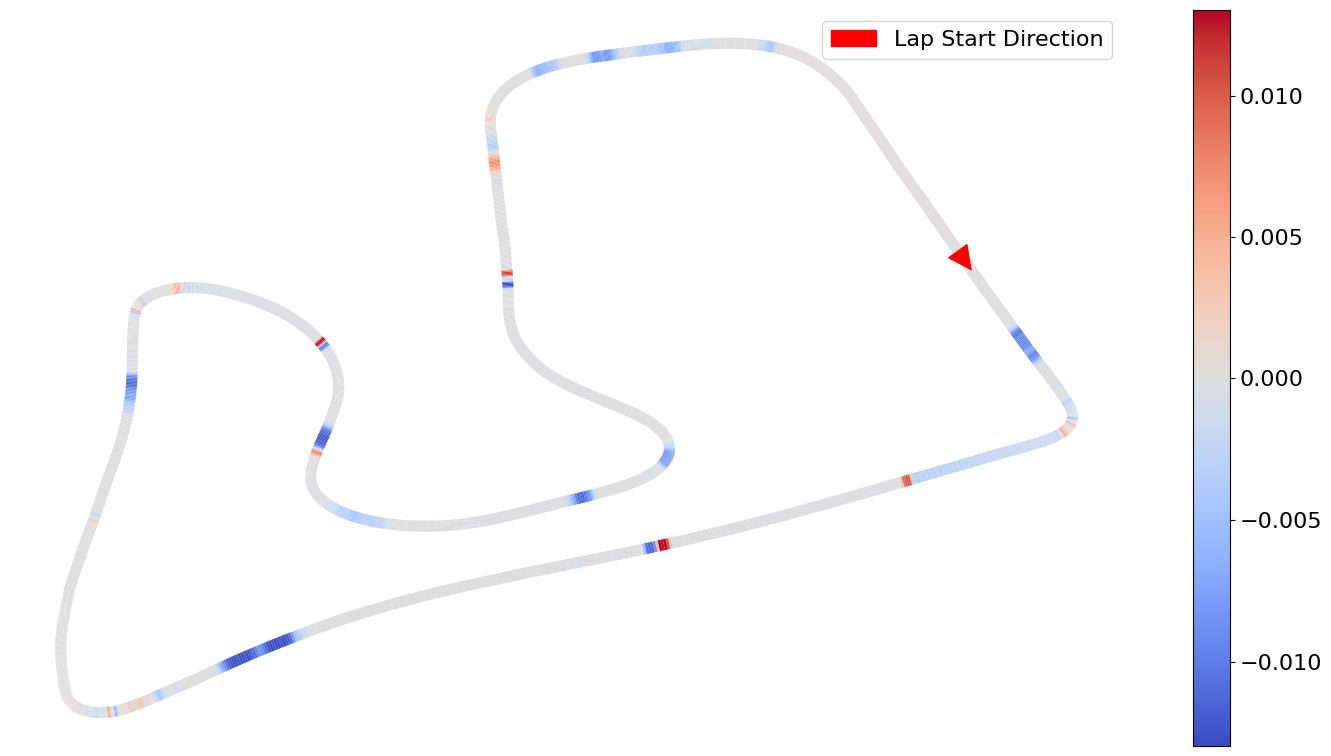

steer angle amplitude df1 mean (no penalty) 32.3929503493976
steer angle amplitude df2 mean (penalty) 21.730866245655548
-32.915


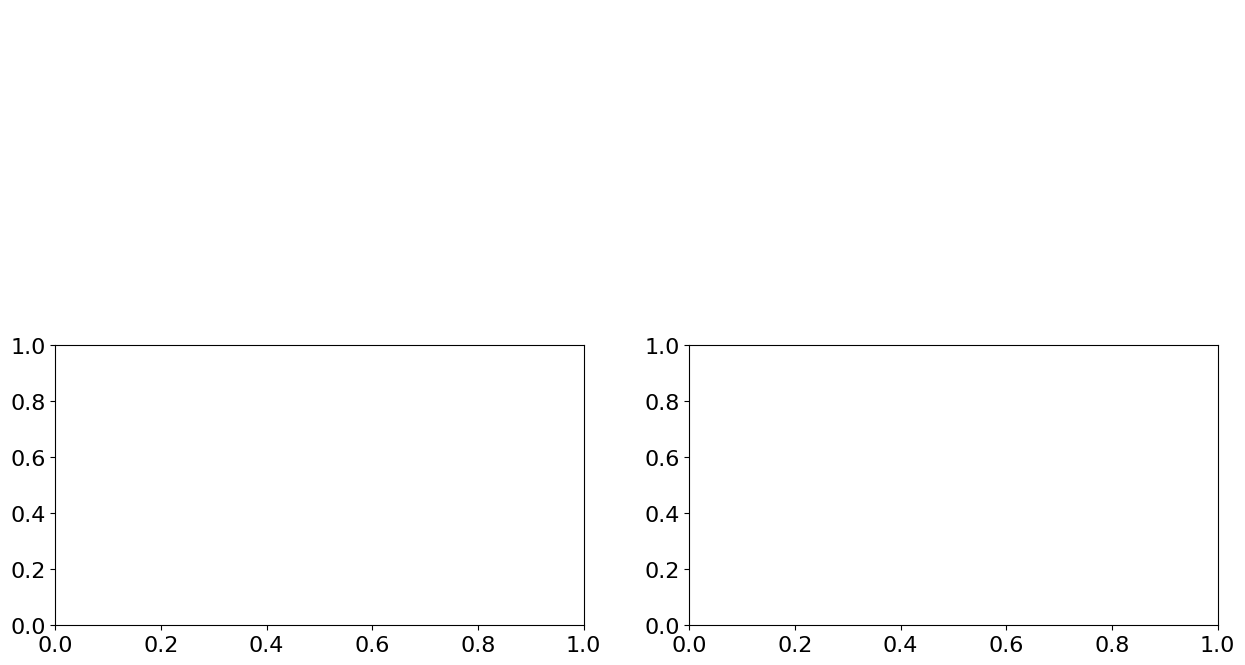

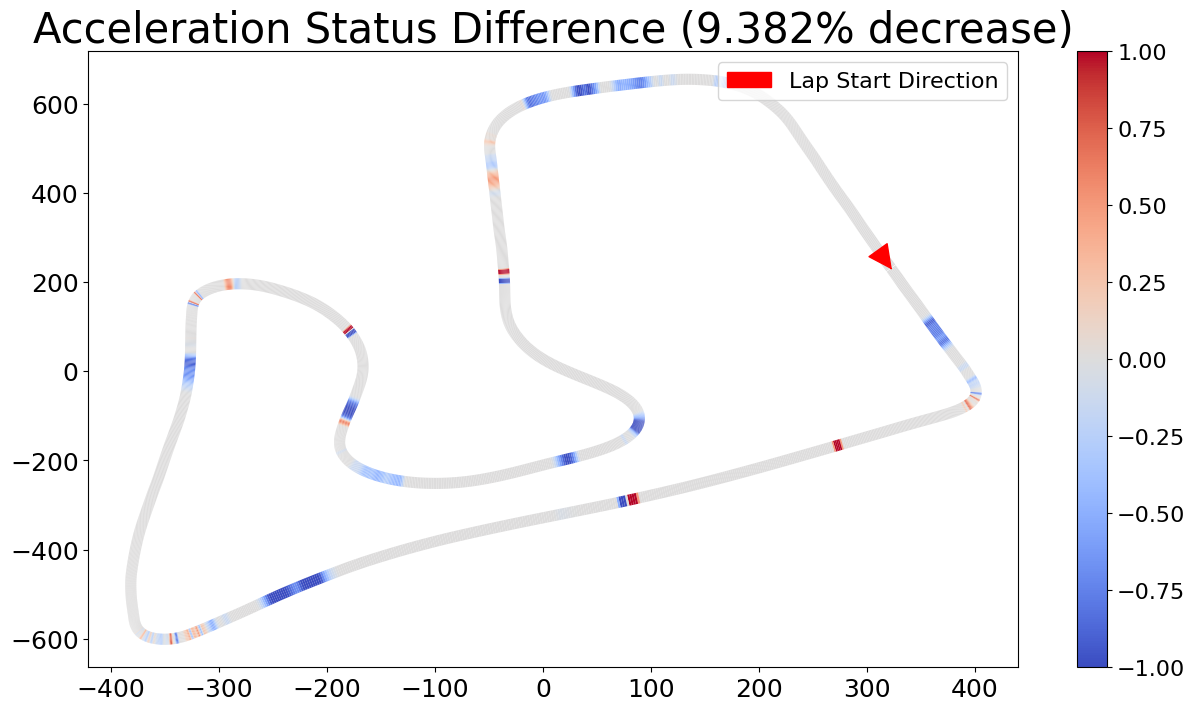

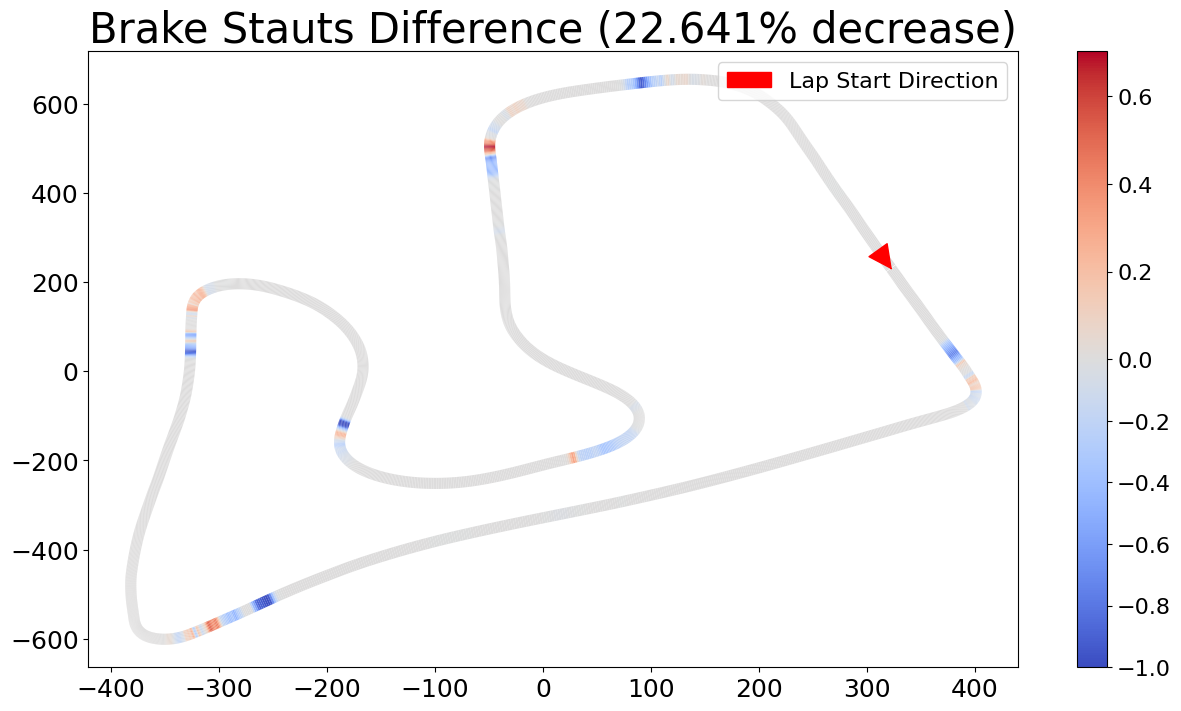

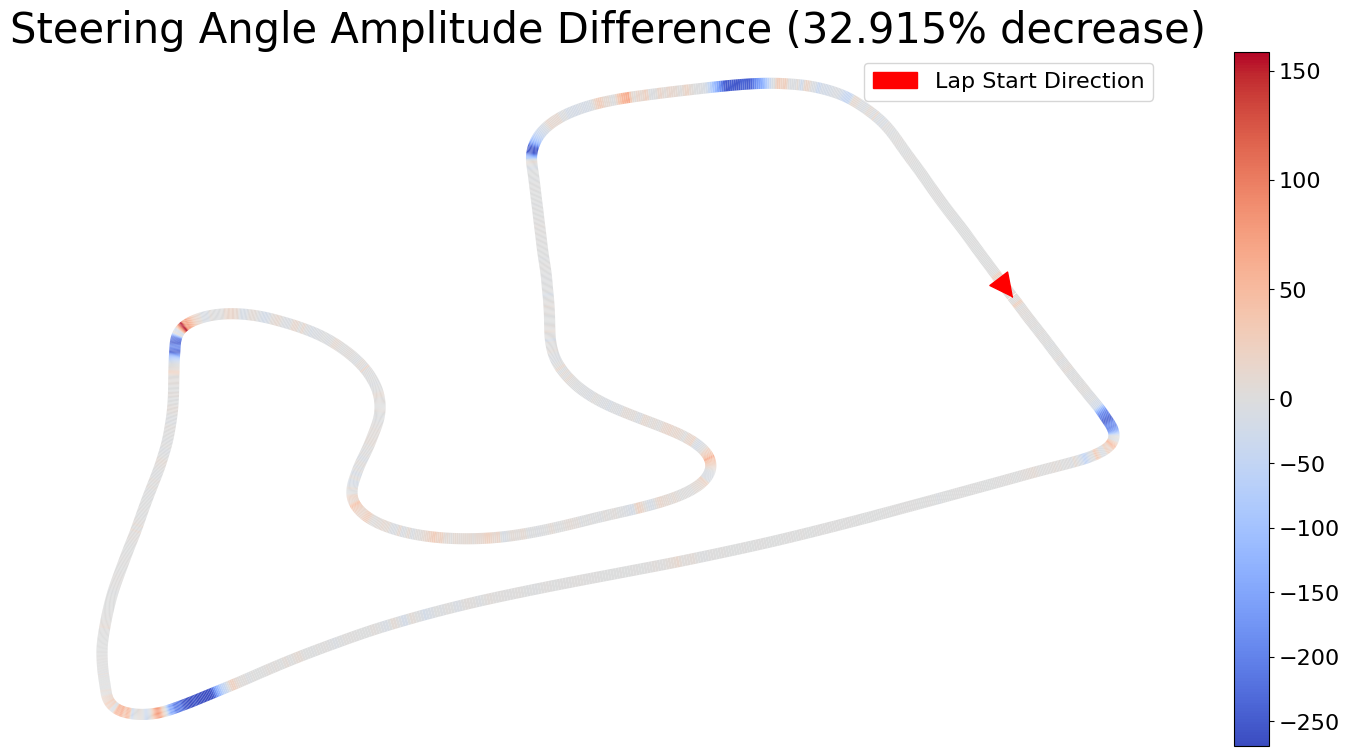

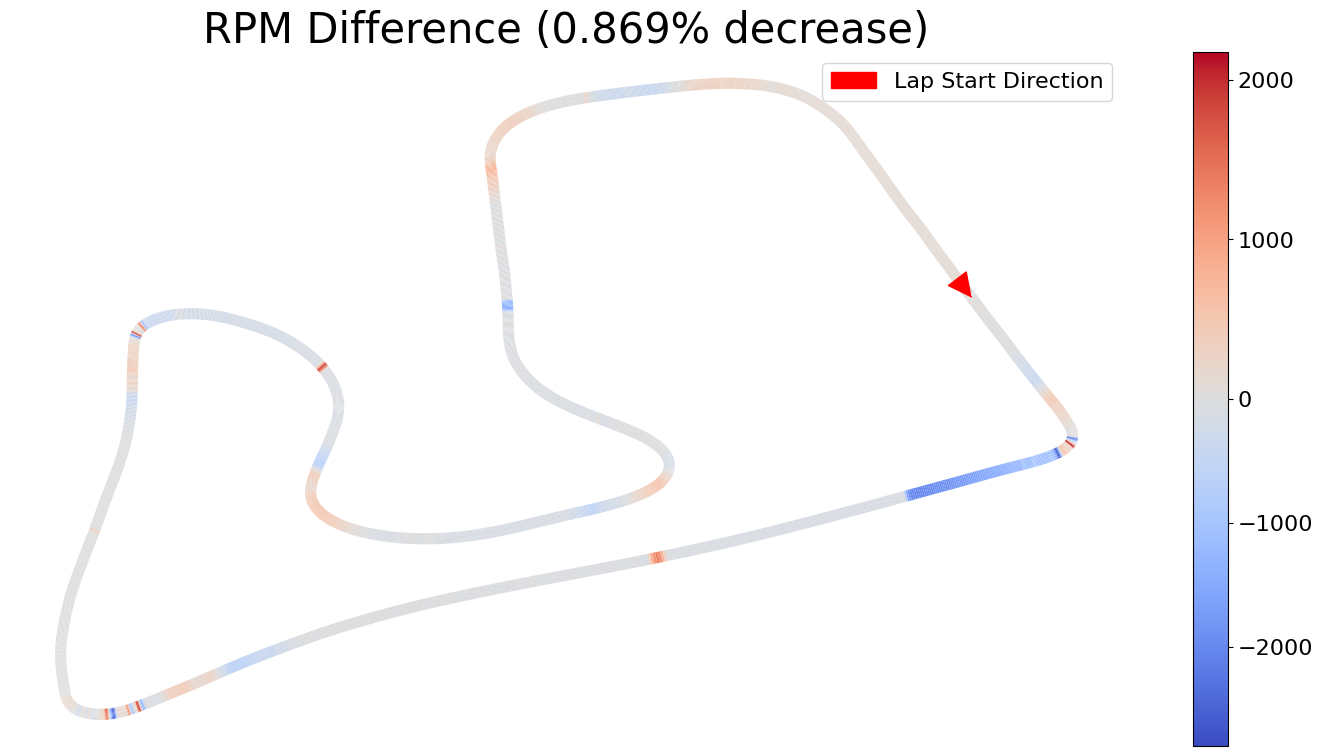

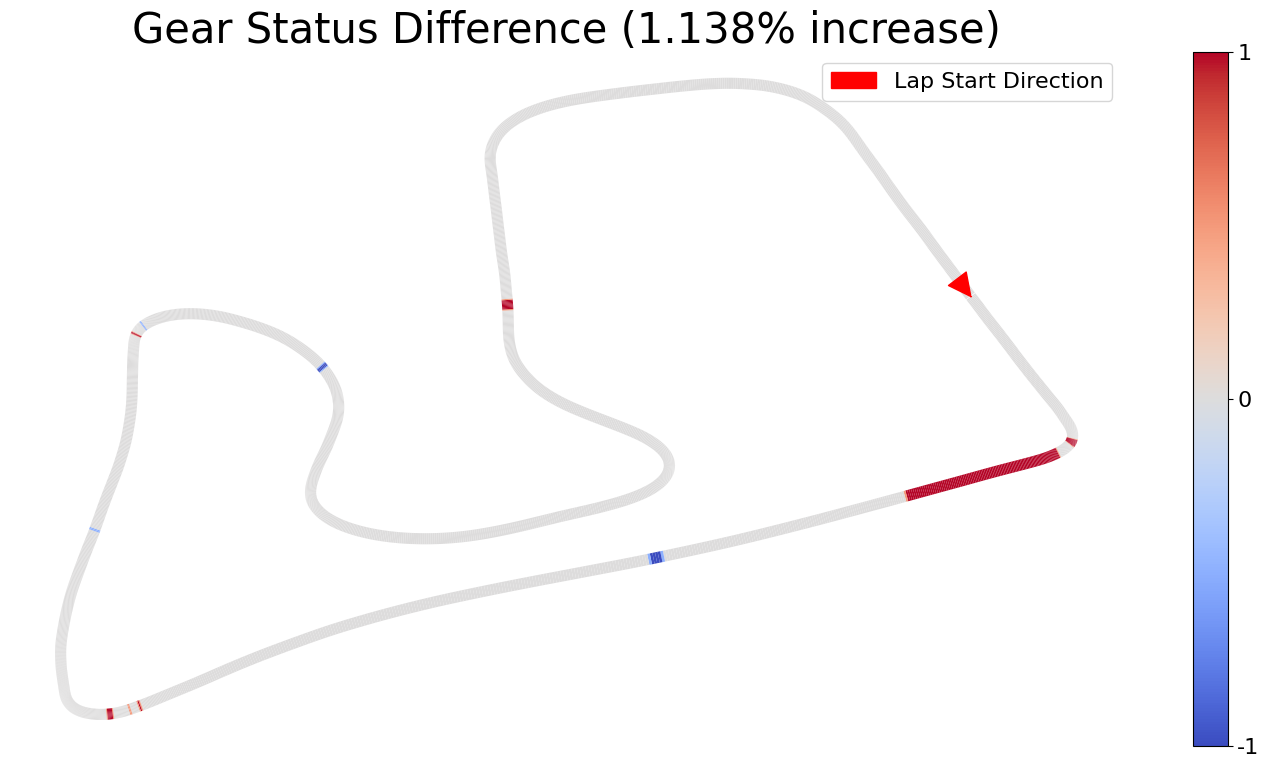

In [7]:

def plot_lap_by_metric(df_1, df_2, metric_col, title, suptitle, cbar_label, is_cbar_int=False, main_fig=None, main_ax=None):
    '''
    will subtract df_2[metric_col] - df_1[metric_col] and build a lap that shows the difference (blue - lower, red - higher)
    '''
    x, y= df_1['world_position_x'].values, df_1['world_position_y'].values

    metric = df_2[metric_col].fillna(0).values - df_1[metric_col].fillna(0).values[:len(df_2)]

    if metric_col == 'delta_fuel':
        metric *= 10
    

    # Each segment is between two points, so we take the average metric for each segment
    segment_values = (metric[:-1] + metric[1:]) / 2

    # Build segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Build the plot
    fig, ax = plt.subplots(figsize=(15, 8))

    vmin = segment_values.min()
    vmax = segment_values.max()
    vcenter = 0

    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    lc = LineCollection(segments, cmap='coolwarm', norm=norm)
    lc.set_array(segment_values)
    lc.set_linewidth(8)

    ax.add_collection(lc)

    # Set axis labels and scaling
    #ax.set_xlabel('Track Position X (m)', fontsize=26)
    #ax.set_ylabel('Track Position Y (m)', fontsize=26)
    if (title != ''):
        ax.set_title(f'{title}', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.autoscale()

    # Add colorbar for the custom metric
    cbar = fig.colorbar(lc, ax=ax)
    # cbar.set_label(cbar_label, fontsize=26)

    if is_cbar_int:
        cbar.set_ticks(np.arange(np.floor(vmin), np.ceil(vmax) + 1))
        cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

    lap_arrow = fancy_triangle(x, y)
    ax.add_patch(lap_arrow)
    ax.legend(handles=[lap_arrow], loc='upper right', fontsize=16) 
    if main_ax is None:
        plt.tight_layout()
        plt.axis('off')
        plt.show()
    else:
        main_ax.axis('off')


df_no_penalty = return_df_for_fastest_lap('0513_redbull_gt3_seed_1_seq_3')
df_penalty = return_df_for_fastest_lap('0421_redbull_gt3_fuel_5p_seed_0')


metric_name = "delta_fuel"
delta_fuel_diff = (((df_penalty[metric_name].mean() - df_no_penalty[metric_name].mean()) / df_no_penalty[metric_name].mean()) * 100).round(3)

plot_lap_by_metric(
    df_1=df_no_penalty, 
    df_2=df_penalty,
    metric_col='delta_fuel',
    title='',
    #title=f'Fuel Consumption Difference ({np.abs(delta_fuel_diff)}% {decrease_or_increase(delta_fuel_diff)})',
    suptitle='(Blue segments - New reward saves fuel, Red segments - New reward consumes more fuel)',
    cbar_label='Delta Fuel Difference (L)')


# Build the plot
fig, ax = plt.subplots(figsize=(15, 8), nrows=2, ncols=2)

metric_name = 'accStatus'
acc_status_diff = (((df_penalty[metric_name].mean() - df_no_penalty[metric_name].mean()) / df_no_penalty[metric_name].mean()) * 100).round(3)

plot_lap_by_metric(
    df_1=df_no_penalty,
    df_2=df_penalty,
    metric_col='accStatus',
    title=f'Acceleration Status Difference ({np.abs(acc_status_diff)}% {decrease_or_increase(acc_status_diff)})',
    suptitle='(Blue segments - New reward accelerates less, Red segments - New reward accelerates more)',
    cbar_label='Acceleration Status Difference',
    main_fig=fig, main_ax=ax[0,0]
)

metric_name = 'brakeStatus'
brake_status_diff = (((df_penalty[metric_name].mean() - df_no_penalty[metric_name].mean()) / df_no_penalty[metric_name].mean()) * 100).round(3)

plot_lap_by_metric(
    df_1=df_no_penalty,
    df_2=df_penalty,
    metric_col='brakeStatus',
    title=f'Brake Stauts Difference ({np.abs(brake_status_diff)}% {decrease_or_increase(brake_status_diff)})',
    suptitle='(Blue segments - New reward brakes less, Red segments - New reward brakes more)',
    cbar_label='brakeStauts Difference',
    main_fig=fig, main_ax=ax[0,1]
)

df_no_penalty['steerAngleAmplitude'] = np.abs(df_no_penalty['steerAngle'])
df_penalty['steerAngleAmplitude'] = np.abs(df_penalty['steerAngle'])

metric_name = 'steerAngleAmplitude'
print('steer angle amplitude df1 mean (no penalty)', df_no_penalty['steerAngleAmplitude'].mean())
print('steer angle amplitude df2 mean (penalty)', df_penalty['steerAngleAmplitude'].mean())
steer_angle_amplitude_diff = (((df_penalty[metric_name].mean() - df_no_penalty[metric_name].mean()) / df_no_penalty[metric_name].mean()) * 100).round(3)
print(steer_angle_amplitude_diff)

plot_lap_by_metric(
    df_1=df_no_penalty,
    df_2=df_penalty,
    metric_col='steerAngleAmplitude',
    title=f'Steering Angle Amplitude Difference ({np.abs(steer_angle_amplitude_diff)}% {decrease_or_increase(steer_angle_amplitude_diff)})',
    suptitle='(Blue segments - New reward steers less, Red segments - New reward steers more)',
    cbar_label='Steer Angle Amplitude Difference',
)


metric_name = 'RPM'
rpm_diff = (((df_penalty[metric_name].mean() - df_no_penalty[metric_name].mean()) / df_no_penalty[metric_name].mean()) * 100).round(3)

plot_lap_by_metric(
    df_1=df_no_penalty,
    df_2=df_penalty,
    metric_col='RPM',
    title=f'RPM Difference ({np.abs(rpm_diff)}% {decrease_or_increase(rpm_diff)})',
    suptitle='(Blue segments - New reward has lower RPM, Red segments - New reward has higher RPM)',
    cbar_label='RPM Difference',
)



metric_name = 'actualGear'
actual_gear_diff = (((df_penalty[metric_name].mean() - df_no_penalty[metric_name].mean()) / df_no_penalty[metric_name].mean()) * 100).round(3)

plot_lap_by_metric(
    df_1=no_gear_1_changes(df_no_penalty),
    df_2=no_gear_1_changes(df_penalty),
    metric_col='actualGear',
    title=f'Gear Status Difference ({np.abs(actual_gear_diff)}% {decrease_or_increase(actual_gear_diff)})',
    suptitle='(Blue segments - New reward stays in lower gear, Red segments - New reward stays in higher gear)',
    cbar_label='Gear Difference',
    is_cbar_int=True
)


In [8]:
def plot_lap_by_metric(df_1, df_2, metric_col, title, suptitle, cbar_label, is_cbar_int=False, ax=None, fig=None, plt_params=None):
    '''
    Will subtract df_2[metric_col] - df_1[metric_col] and build a lap that shows the difference (blue - lower, red - higher)
    '''
    x, y = df_1['world_position_x'].values, df_1['world_position_y'].values

    metric = df_2[metric_col].fillna(0).values - df_1[metric_col].fillna(0).values[:len(df_2)]

    if metric_col == 'delta_fuel':
        metric *= 10

    segment_values = (metric[:-1] + metric[1:]) / 2

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    if ax is None or fig is None:
        fig, ax = plt.subplots(figsize=(15, 8))

    vmin = segment_values.min()
    vmax = segment_values.max()
    vcenter = 0

    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    lc = LineCollection(segments, cmap='coolwarm', norm=norm)
    lc.set_array(segment_values)
    lc.set_linewidth(8)

    ax.add_collection(lc)

    if title != '':
        ax.set_title(f'{title}', fontsize=plt_params['axes.titlesize'])

    ax.tick_params(axis='both', which='major', labelsize=plt_params['ticks.labelsize'])
    ax.autoscale()
    ax.axis('off')

    # Add colorbar to the current fig and ax
    cbar = fig.colorbar(lc, ax=ax)
    if is_cbar_int:
        cbar.set_ticks(np.arange(np.floor(vmin), np.ceil(vmax) + 1))
        cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

    lap_arrow = fancy_triangle(x, y)
    ax.add_patch(lap_arrow)
    ax.legend(handles=[lap_arrow], loc='upper right', fontsize=plt_params['legend.fontsize'])

    if ax is None:
        plt.tight_layout()
        plt.show()


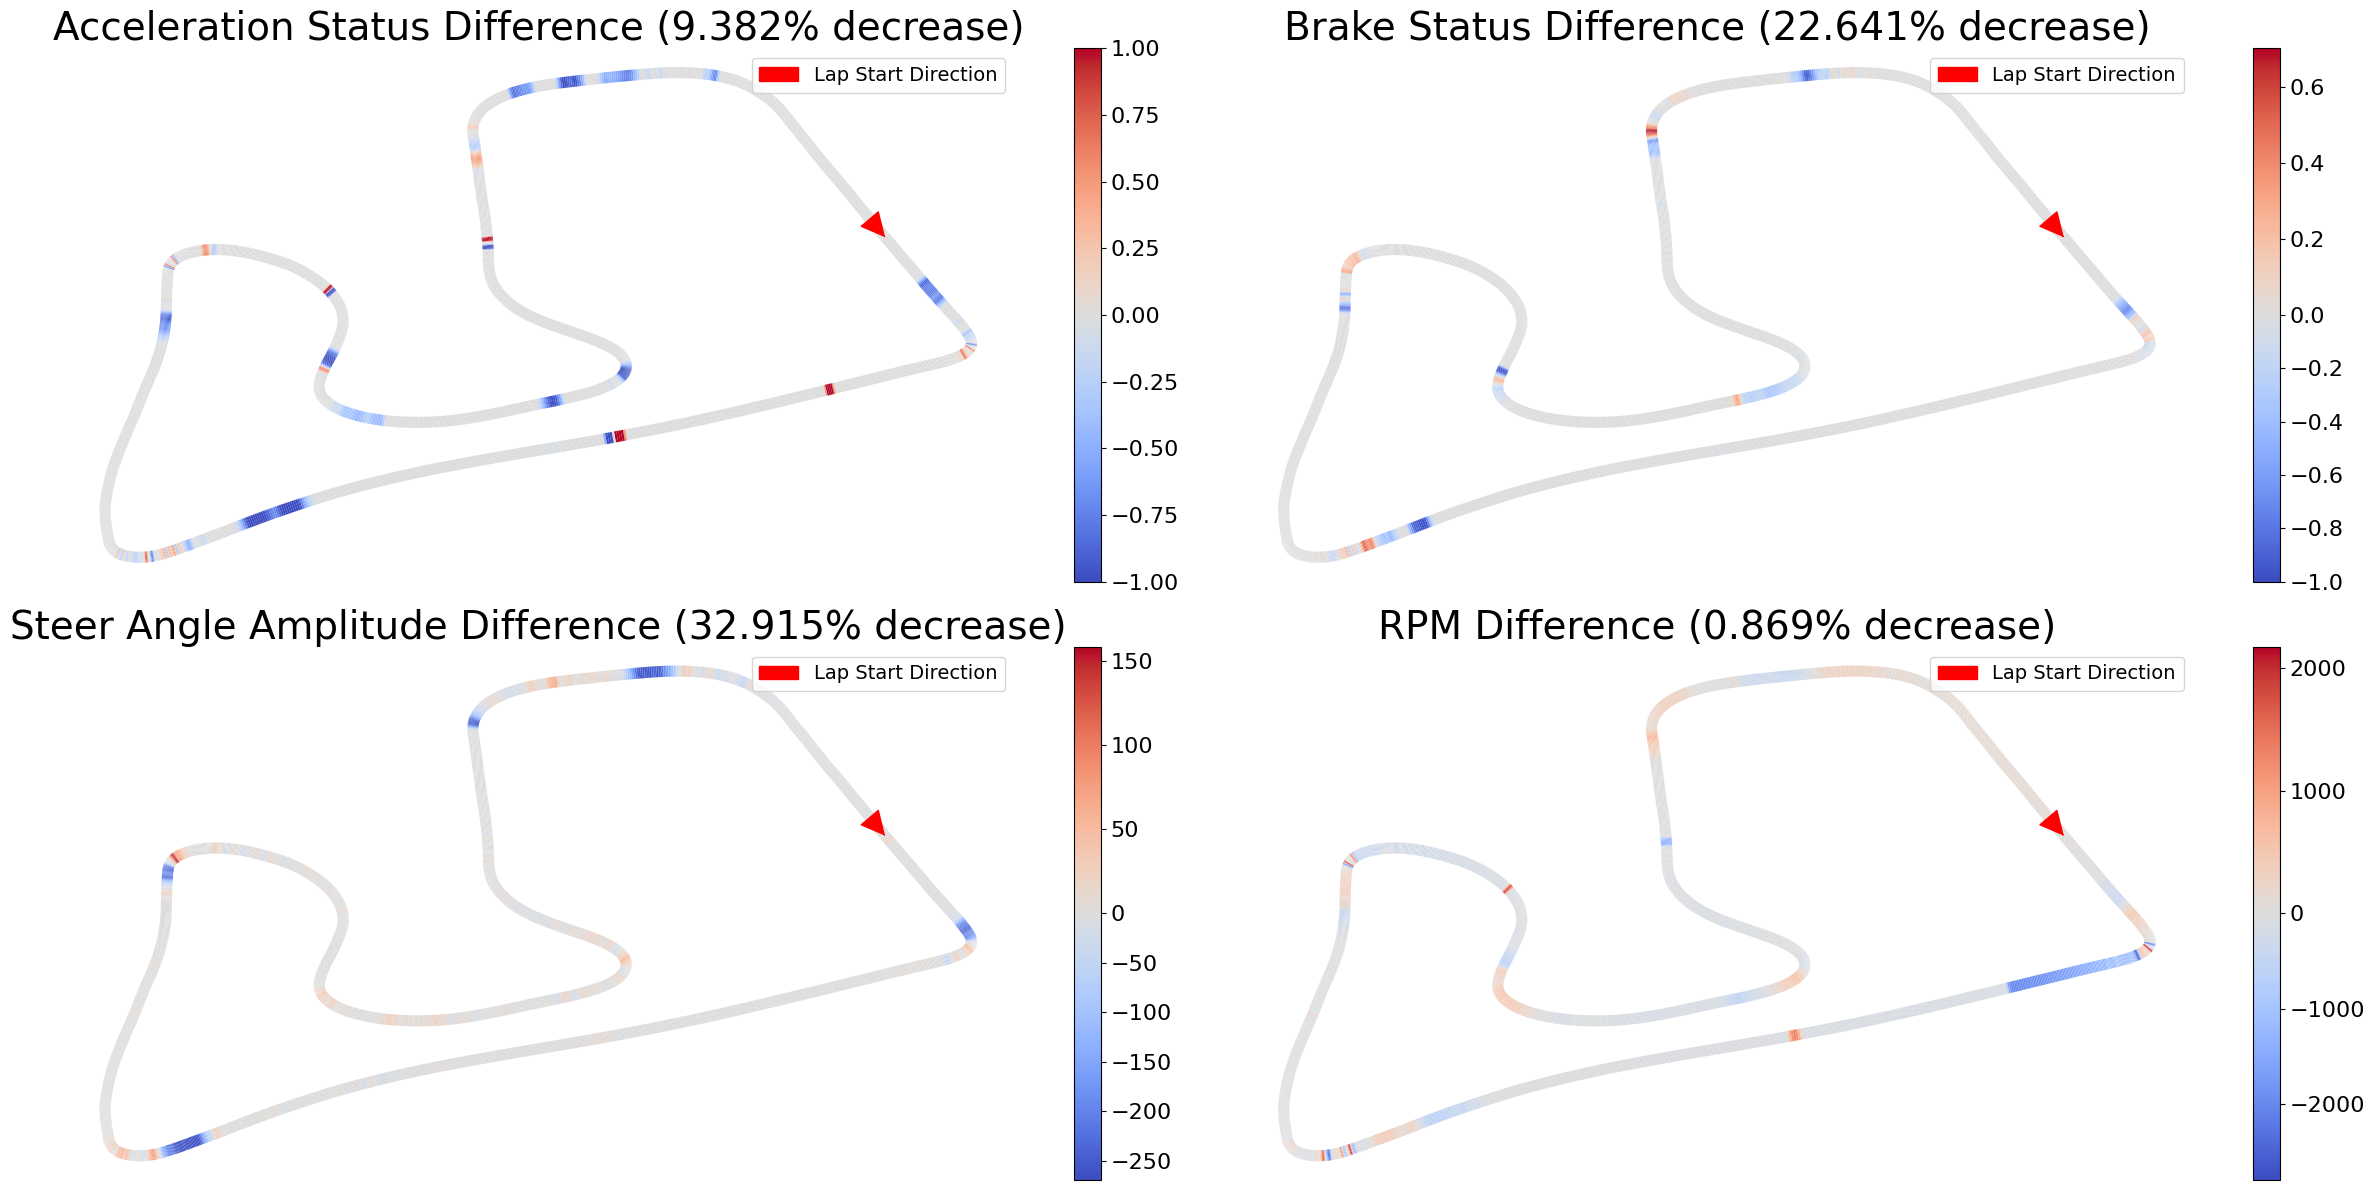

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(presentation_plt_params['figsize_x'], presentation_plt_params['figsize_y']))
axs = axs.flatten()

metrics = [
    ("accStatus", 'Acceleration Status'),
    ("brakeStatus", 'Brake Status'),
    ("steerAngleAmplitude", 'Steer Angle Amplitude'),
    ("RPM", 'RPM'),
]

df_no_penalty['steerAngleAmplitude'] = np.abs(df_no_penalty['steerAngle'])
df_penalty['steerAngleAmplitude'] = np.abs(df_penalty['steerAngle'])

for i, (metric_name, label) in enumerate(metrics):
    diff = (((df_penalty[metric_name].mean() - df_no_penalty[metric_name].mean()) /
             df_no_penalty[metric_name].mean()) * 100).round(3)
    
    title = f"{label} Difference ({np.abs(diff)}% {decrease_or_increase(diff)})"
    suptitle = f"(Blue segments - New reward {label.lower()}s less, Red segments - more)"
    cbar_label = f"{label} Difference"

    plot_lap_by_metric(
        df_1=df_no_penalty,
        df_2=df_penalty,
        metric_col=metric_name,
        title=title,
        suptitle=suptitle,
        cbar_label=cbar_label,
        ax=axs[i],
        fig=fig,
        plt_params=presentation_plt_params
    )

plt.tight_layout()
plt.show()


### calculating average acceleration, braking, rpm, steer angle amplitude 

In [10]:
from tabulate import tabulate
import pandas as pd

# Compute the means
no_penalty_means = {
    "accStatus": df_no_penalty['accStatus'].mean(),
    "brakeStatus": df_no_penalty['brakeStatus'].mean(),
    "RPM": df_no_penalty['RPM'].mean(),
    "steerAngleAmplitude": df_no_penalty['steerAngleAmplitude'].mean()
}

penalty_means = {
    "accStatus": df_penalty['accStatus'].mean(),
    "brakeStatus": df_penalty['brakeStatus'].mean(),
    "RPM": df_penalty['RPM'].mean(),
    "steerAngleAmplitude": df_penalty['steerAngleAmplitude'].mean()
}

# Compute percentage differences
percent_diff = {
    key: ((penalty_means[key] - no_penalty_means[key]) / no_penalty_means[key]) * 100
    if no_penalty_means[key] != 0 else float('nan')
    for key in no_penalty_means
}

# Create DataFrame
mean_df = pd.DataFrame(
    [no_penalty_means, penalty_means, percent_diff],
    index=['No Penalty', 'Penalty', '% Difference']
)

# Round for cleaner display
mean_df = mean_df.round(3)

# Display using tabulate
print(tabulate(mean_df, headers='keys', tablefmt='grid', showindex=True))


+--------------+-------------+---------------+----------+-----------------------+
|              |   accStatus |   brakeStatus |      RPM |   steerAngleAmplitude |
+==============+=============+===============+==========+=======================+
| No Penalty   |       0.743 |         0.097 | 6654.72  |                32.393 |
+--------------+-------------+---------------+----------+-----------------------+
| Penalty      |       0.673 |         0.075 | 6596.88  |                21.731 |
+--------------+-------------+---------------+----------+-----------------------+
| % Difference |      -9.382 |       -22.641 |   -0.869 |               -32.915 |
+--------------+-------------+---------------+----------+-----------------------+


In [11]:
# # plot lap map without anything

# df = return_df_for_fastest_lap('0513_redbull_gt3_seed_1_seq_3')
# x, y = df['world_position_x'].values, df['world_position_y'].values

# fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# fig.tight_layout()
# ax[0].plot(x, y)
# ax[0].set_title('Track A')
# ax[0].axis('off')

# lap_arrow = fancy_triangle(x, y)
# ax[0].add_patch(lap_arrow)

# df = return_df_for_fastest_lap('0509_monza_gt3_seed_2_seq_3')
# x, y = df['world_position_x'].values, df['world_position_y'].values
# lap_arrow = fancy_triangle(x, y)
# ax[1].add_patch(lap_arrow)
# ax[1].plot(x, y)
# ax[1].set_title('Track B')
# ax[1].axis('off')


# Plotting the partial correlations for the following metrics:

continuous metrics:

- speed
- RPM
- steerAngleAmplitude
- brakeStatus
- accStatus
- velocity_x
- velocity_y
- velocity_z
- yaw
- roll
- angular_velocity_y
- angular_velocity_x

discrete metrics: 
- actualGear


In [12]:
from sklearn.linear_model import LinearRegression
import pingouin as pg
import pandas as pd

testing_subset = list(testing_infos.items())[:1]
for testing_key, testing_info in testing_subset:
    print(testing_key)
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # read summary df
        summary_df = pd.read_csv(att['eval_summary'])

        # Find columns with lap times
        lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        # Compute the best lap time per episode (min across all lap columns)
        best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
        best_lap_index = int(best_lap_column.values[0].split('_')[1])

        # Filter only the fastest lap
        episode_df = episode_df[episode_df['LapCount'] == best_lap_index]
        
        # Add delta_fuel
        episode_df['delta_fuel'] =  (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna()
        
        # Add steer angle amplitude
        episode_df['steerAngleAmplitude'] = np.abs(episode_df['steerAngle'])

        # print(episode_df.columns)
        # get all features that you want to analyze
        features = [
            'speed', 'RPM', 'steerAngleAmplitude', 'brakeStatus', 'accStatus',
            'velocity_x', 'velocity_y', 'velocity_z',
            'yaw', 'roll', 'angular_velocity_y', 'angular_velocity_x'
        ]

        # Store results
        results = []

        # Loop through features to compute partial correlation with deltaFuel
        for feature in features:
            # Set other features as covariates
            covariates = [f for f in features if f != feature]
            
            try:
                res = pg.partial_corr(data=episode_df, x=feature, y='delta_fuel', covar=covariates, method='pearson')
                res['feature'] = feature
                results.append(res)
            except Exception as e:
                print(f"Failed for {feature}: {e}")

        partial_corr_df = pd.concat(results).sort_values(by='r', ascending=False)
        print(partial_corr_df[['feature', 'r', 'p-val', 'CI95%']])




0513_redbull_gt3_seed_1_seq_3
                     feature         r          p-val           CI95%
pearson            accStatus  0.939639   0.000000e+00    [0.93, 0.94]
pearson                  RPM  0.591157  5.951506e-218    [0.56, 0.62]
pearson  steerAngleAmplitude  0.203679   4.502760e-23    [0.16, 0.24]
pearson                speed  0.080066   1.162371e-04    [0.04, 0.12]
pearson                 roll  0.067368   1.190208e-03    [0.03, 0.11]
pearson           velocity_y  0.029919   1.503980e-01   [-0.01, 0.07]
pearson           velocity_x  0.019414   3.507723e-01   [-0.02, 0.06]
pearson                  yaw -0.010541   6.124594e-01   [-0.05, 0.03]
pearson   angular_velocity_x -0.061673   3.010653e-03   [-0.1, -0.02]
pearson   angular_velocity_y -0.063344   2.309894e-03   [-0.1, -0.02]
pearson           velocity_z -0.080677   1.029774e-04  [-0.12, -0.04]
pearson          brakeStatus -0.292877   5.843587e-47  [-0.33, -0.26]


In [13]:
from sklearn.linear_model import LinearRegression
import pingouin as pg
import pandas as pd

testing_subset = list(testing_infos.items())[:1]
for testing_key, testing_info in testing_subset:
    print(testing_key)
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # read summary df
        summary_df = pd.read_csv(att['eval_summary'])

        # Find columns with lap times
        lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        # Compute the best lap time per episode (min across all lap columns)
        best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
        best_lap_index = int(best_lap_column.values[0].split('_')[1])

        # Filter only the fastest lap
        episode_df = episode_df[episode_df['LapCount'] == best_lap_index]
        
        # Add delta_fuel
        episode_df['delta_fuel'] =  (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna()
        
        # Add steer angle amplitude
        episode_df['steerAngleAmplitude'] = np.abs(episode_df['steerAngle'])

        # print(episode_df.columns)
        # get all features that you want to analyze
        features = [
            'speed', 'RPM', 'steerAngleAmplitude', 'brakeStatus', 'accStatus',
            'velocity_x', 'velocity_y', 'velocity_z',
            'yaw', 'roll', 'angular_velocity_y', 'angular_velocity_x'
        ]

        # Store results
        results = []

        # Loop through features to compute partial correlation with deltaFuel
        for feature in features:
            # Set other features as covariates
            covariates = [f for f in features if f != feature]
            
            try:
                res = pg.partial_corr(data=episode_df, x=feature, y='delta_fuel', covar=covariates, method='pearson')
                res['feature'] = feature
                results.append(res)
            except Exception as e:
                print(f"Failed for {feature}: {e}")

        partial_corr_df = pd.concat(results)
        partial_corr_df['abs_r'] = partial_corr_df['r'].abs()
        partial_corr_df = partial_corr_df.sort_values(by='abs_r', ascending=False)
        print(partial_corr_df[['feature', 'r', 'p-val', 'CI95%']])




0513_redbull_gt3_seed_1_seq_3
                     feature         r          p-val           CI95%
pearson            accStatus  0.939639   0.000000e+00    [0.93, 0.94]
pearson                  RPM  0.591157  5.951506e-218    [0.56, 0.62]
pearson          brakeStatus -0.292877   5.843587e-47  [-0.33, -0.26]
pearson  steerAngleAmplitude  0.203679   4.502760e-23    [0.16, 0.24]
pearson           velocity_z -0.080677   1.029774e-04  [-0.12, -0.04]
pearson                speed  0.080066   1.162371e-04    [0.04, 0.12]
pearson                 roll  0.067368   1.190208e-03    [0.03, 0.11]
pearson   angular_velocity_y -0.063344   2.309894e-03   [-0.1, -0.02]
pearson   angular_velocity_x -0.061673   3.010653e-03   [-0.1, -0.02]
pearson           velocity_y  0.029919   1.503980e-01   [-0.01, 0.07]
pearson           velocity_x  0.019414   3.507723e-01   [-0.02, 0.06]
pearson                  yaw -0.010541   6.124594e-01   [-0.05, 0.03]


## Hypothesis: the model learned to decelerate without braking (because braking consumes fuel)

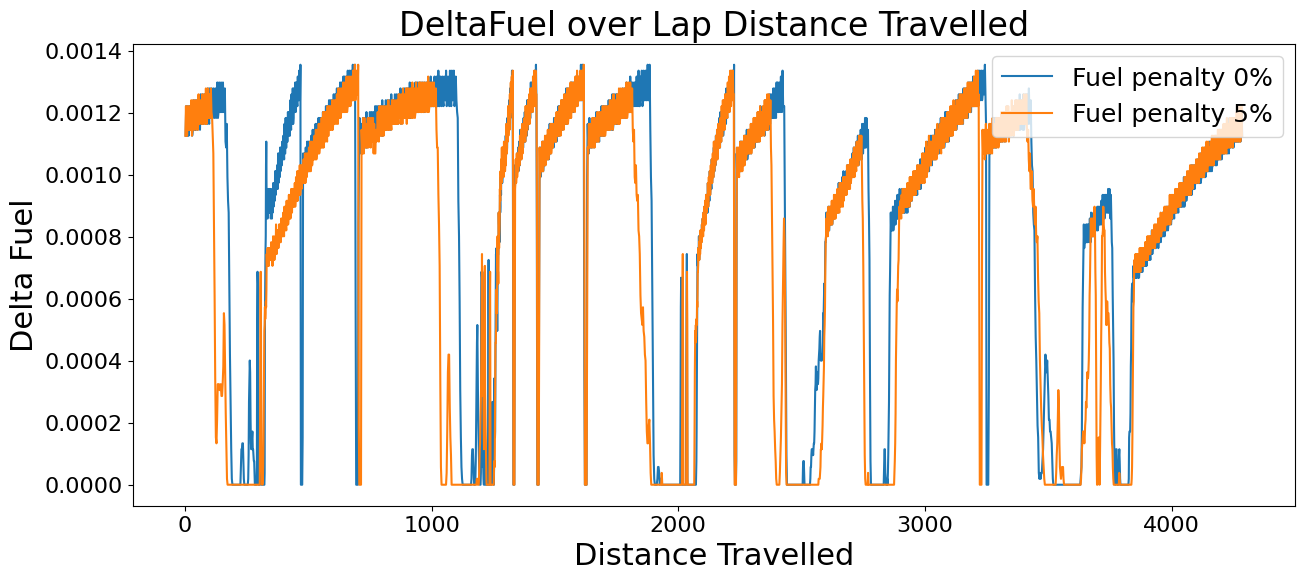

In [14]:
plt.figure(figsize=(15,6))
linewidth = 1

testing_subset = list(testing_infos.items())
for testing_key, testing_info in testing_subset:
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # read summary df
        summary_df = pd.read_csv(att['eval_summary'])

        # Find columns with lap times
        lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        # Compute the best lap time per episode (min across all lap columns)
        best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
        best_lap_index = int(best_lap_column.values[0].split('_')[1])

        # Filter only the fastest lap
        episode_df = episode_df[episode_df['LapCount'] == best_lap_index]

        # Add delta_fuel
        episode_df['delta_fuel'] =  (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna()

        plt.plot(episode_df['LapDist'], episode_df['delta_fuel'], label=f"{testing_info['fuel_penalty']}", color=testing_info['graph_color'])



plt.xlabel('Distance Travelled')
plt.ylabel('Delta Fuel')
plt.title('DeltaFuel over Lap Distance Travelled')
plt.legend(loc='upper right')
plt.show()

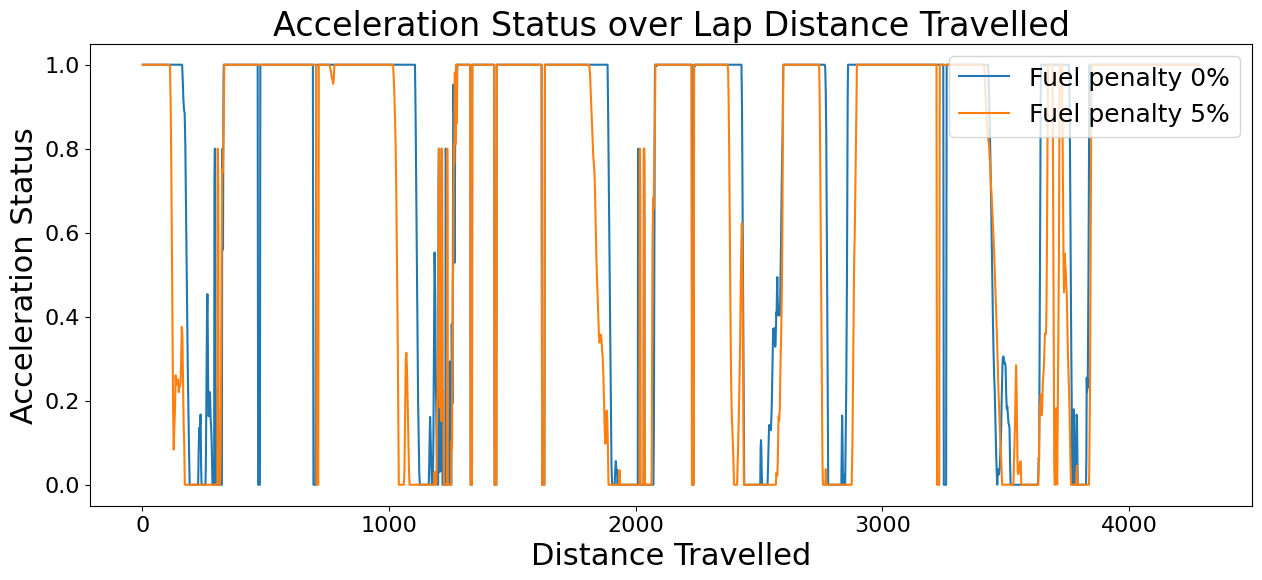

In [15]:
plt.figure(figsize=(15,6))
linewidth = 1

testing_subset = list(testing_infos.items())
for testing_key, testing_info in testing_subset:
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # read summary df
        summary_df = pd.read_csv(att['eval_summary'])

        # Find columns with lap times
        lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        # Compute the best lap time per episode (min across all lap columns)
        best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
        best_lap_index = int(best_lap_column.values[0].split('_')[1])

        # Filter only the fastest lap
        episode_df = episode_df[episode_df['LapCount'] == best_lap_index]

        plt.plot(episode_df['LapDist'].values[:-1], episode_df['accStatus'].values[:-1], label=f"{testing_info['fuel_penalty']}", color=testing_info['graph_color'])



plt.xlabel('Distance Travelled')
plt.ylabel('Acceleration Status')
plt.title('Acceleration Status over Lap Distance Travelled')
plt.legend(loc='upper right')
plt.show()

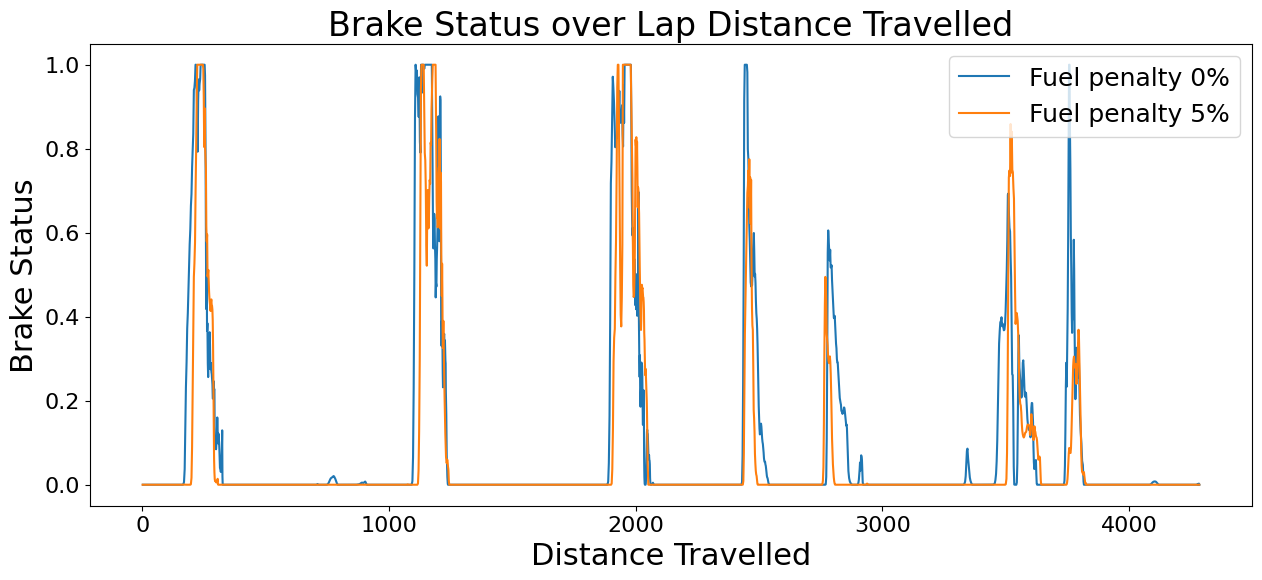

In [16]:
plt.figure(figsize=(15,6))
linewidth = 1

testing_subset = list(testing_infos.items())
for testing_key, testing_info in testing_subset:
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # read summary df
        summary_df = pd.read_csv(att['eval_summary'])

        # Find columns with lap times
        lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        # Compute the best lap time per episode (min across all lap columns)
        best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
        best_lap_index = int(best_lap_column.values[0].split('_')[1])

        # Filter only the fastest lap
        episode_df = episode_df[episode_df['LapCount'] == best_lap_index]

        plt.plot(episode_df['LapDist'].values[:-1], episode_df['brakeStatus'].values[:-1], label=f"{testing_info['fuel_penalty']}", color=testing_info['graph_color'])



plt.xlabel('Distance Travelled')
plt.ylabel('Brake Status')
plt.title('Brake Status over Lap Distance Travelled')
plt.legend(loc='upper right')
plt.show()

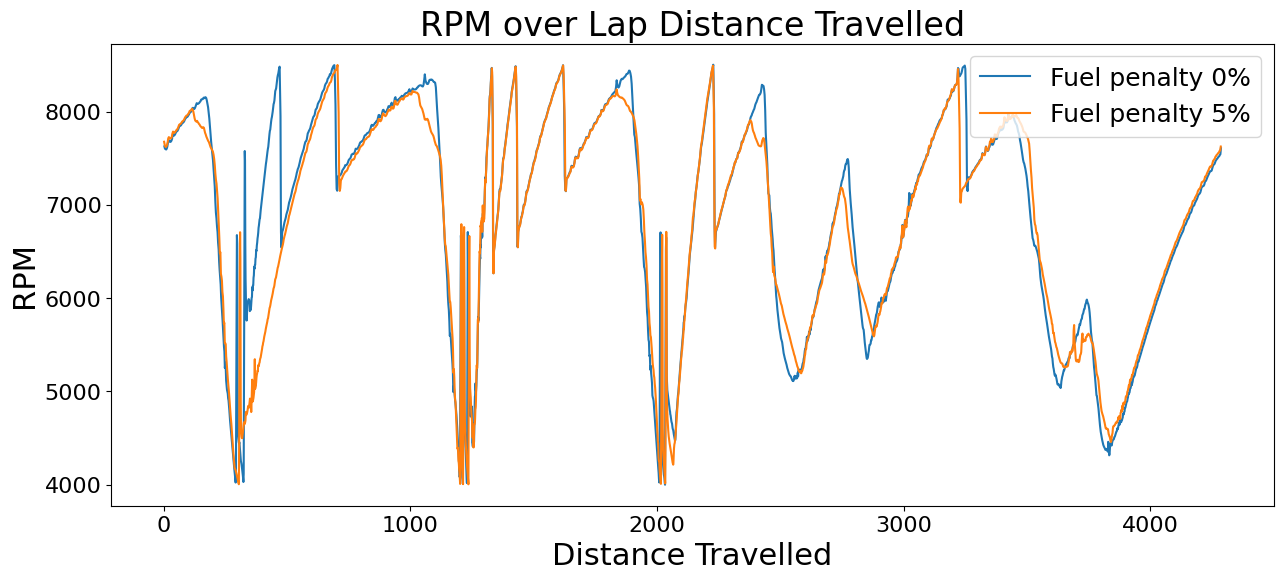

In [17]:
plt.figure(figsize=(15,6))
linewidth = 1

testing_subset = list(testing_infos.items())
for testing_key, testing_info in testing_subset:
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # read summary df
        summary_df = pd.read_csv(att['eval_summary'])

        # Find columns with lap times
        lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        # Compute the best lap time per episode (min across all lap columns)
        best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
        best_lap_index = int(best_lap_column.values[0].split('_')[1])

        # Filter only the fastest lap
        episode_df = episode_df[episode_df['LapCount'] == best_lap_index]

        plt.plot(episode_df['LapDist'].values[:-1], episode_df['RPM'].values[:-1], label=f"{testing_info['fuel_penalty']}", color=testing_info['graph_color'])



plt.xlabel('Distance Travelled')
plt.ylabel('RPM')
plt.title('RPM over Lap Distance Travelled')
plt.legend(loc='upper right')
plt.show()

## Gears

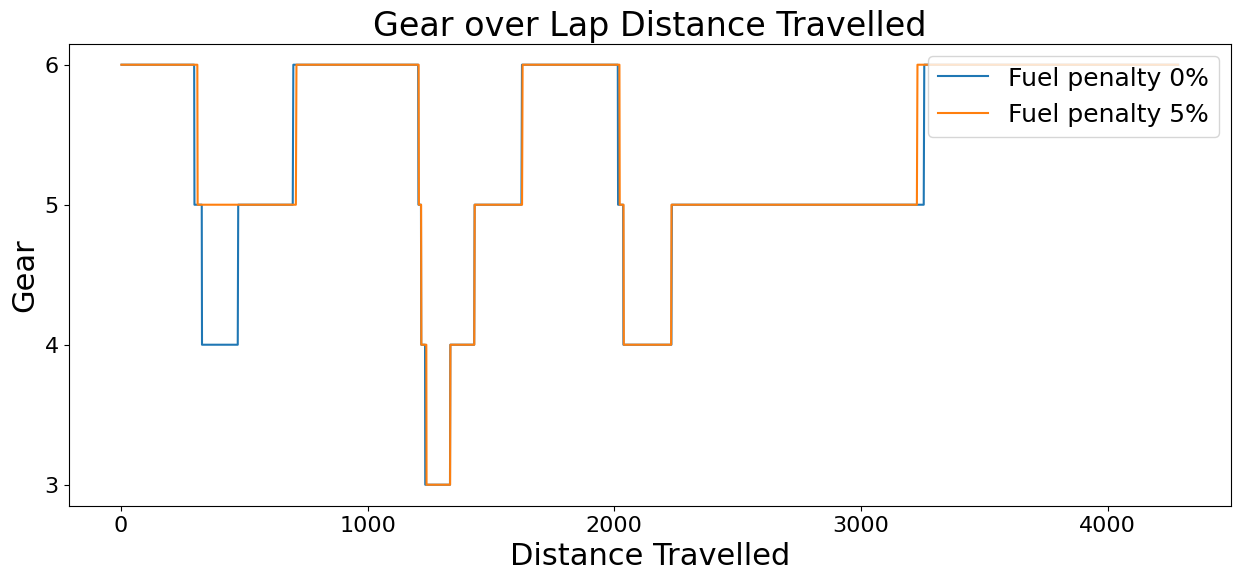

In [18]:
def plot_gear_over_lap_distance_travelled(testing_infos, track, car):
    plt.figure(figsize=(15,6))

    testing_subset = list(testing_infos.items())
    for testing_key, testing_info in testing_subset:
        for i, att in enumerate(testing_info['attempts'][:1]):
            # Read episode df (should be only one)
            csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
            episode_df = pd.read_csv(csv_episode_file)

            # read summary df
            summary_df = pd.read_csv(att['eval_summary'])

            # Find columns with lap times
            lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
            if not lap_time_cols:
                print(f"No lap time columns found in {testing_key}")
                continue

            # Compute the best lap time per episode (min across all lap columns)
            best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
            best_lap_index = int(best_lap_column.values[0].split('_')[1])

            # Filter only the fastest lap
            episode_df = episode_df[episode_df['LapCount'] == best_lap_index]

            no_gear_1_changes(episode_df)
            gear = episode_df['actualGear']
            next_gear_shifts = gear.shift(-1).where(gear.shift(-1).ne(gear))
            episode_df['nextGear'] = next_gear_shifts.bfill().astype('Int64')

            prev_gear_shifts = gear.shift(1).where(gear.shift(1).ne(gear))
            episode_df['prevGear'] = prev_gear_shifts.ffill().astype('Int64')

            prev_gear = episode_df['prevGear']
            next_gear = episode_df['nextGear']
            episode_df['actualGear'] = gear.where(gear.ne(1) | next_gear.eq(2), prev_gear)

            plt.plot(episode_df['LapDist'].values[:-1], episode_df['actualGear'].values[:-1], label=f"{testing_info['fuel_penalty']}", color=testing_info['graph_color'])


    unique_gears = sorted(set(episode_df['actualGear'].dropna().unique()))
    plt.yticks(unique_gears)
    plt.xlabel('Distance Travelled')
    plt.ylabel('Gear')
    plt.title('Gear over Lap Distance Travelled')
    plt.legend(loc='upper right')
    plt.show()

plot_gear_over_lap_distance_travelled(testing_infos, 'Redbull', 'GT3')

# Compare the driving behavior with human driving from their dataset (which they have)

## Plot gear differences on a lap map

## Analyze RPM

## Analyzing the smoothness of the steering wheel angle (Hypothesis: Fuel penalty penalizes for rapid steering wheel movements)

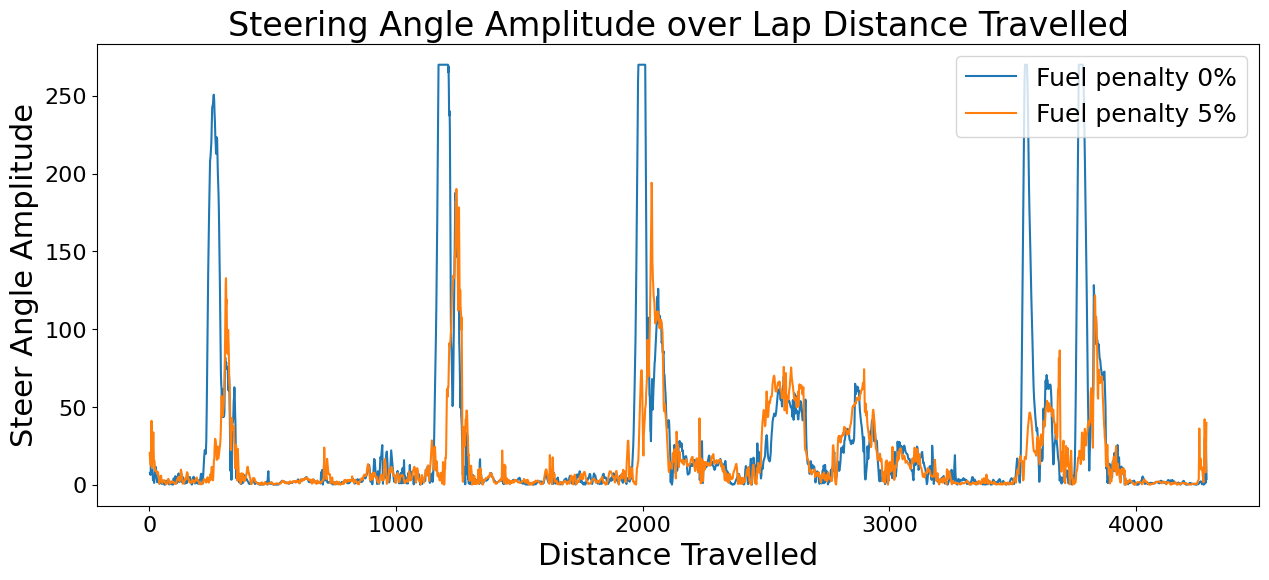

In [19]:
plt.figure(figsize=(15,6))

for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # read summary df
        summary_df = pd.read_csv(att['eval_summary'])

        # Find columns with lap times
        lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        # Compute the best lap time per episode (min across all lap columns)
        best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
        best_lap_index = int(best_lap_column.values[0].split('_')[1])

        # Filter only the fastest lap
        episode_df = episode_df[episode_df['LapCount'] == best_lap_index]

        episode_df['steerAngleAmplitude'] = np.abs(episode_df['steerAngle'])
        plt.plot(episode_df['LapDist'].values[:-1], episode_df['steerAngleAmplitude'].values[:-1], label=f"{testing_info['fuel_penalty']}", color=testing_info['graph_color'])

plt.xlabel('Distance Travelled')
plt.ylabel('Steer Angle Amplitude')
plt.title('Steering Angle Amplitude over Lap Distance Travelled')
plt.legend(loc='upper right')
plt.show()

### Derivative of the steering wheel angle

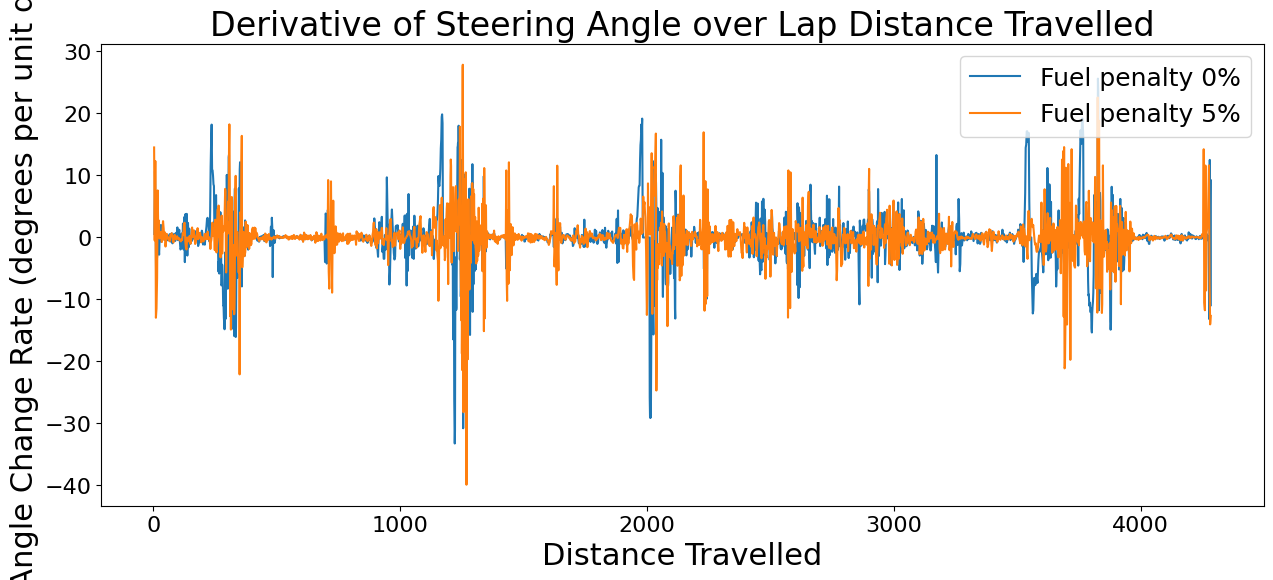

In [20]:
plt.figure(figsize=(15,6))

for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # read summary df
        summary_df = pd.read_csv(att['eval_summary'])

        # Find columns with lap times
        lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        # Compute the best lap time per episode (min across all lap columns)
        best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
        best_lap_index = int(best_lap_column.values[0].split('_')[1])

        # Filter only the fastest lap
        episode_df = episode_df[episode_df['LapCount'] == best_lap_index]

        # 1. Calculate LapDist difference
        episode_df['LapDist_diff'] = episode_df['LapDist'].diff()

        # 2. Mark resets
        episode_df['reset_flag'] = episode_df['LapDist_diff'] < 0

        # 3. Cumulative sum of resets
        episode_df['reset_cumsum'] = episode_df['reset_flag'].cumsum()

        # 4. Remove rows where reset_cumsum > 0
        episode_df = episode_df[episode_df['reset_cumsum'] == 0]

        # Derivative calculation
        lap_dist = episode_df['LapDist'].values
        steer_angle = episode_df['steerAngle'].values

        delta_lap_dist = np.diff(lap_dist)
        delta_steer_angle = np.diff(steer_angle)

        steer_derivative = delta_steer_angle / delta_lap_dist

        lap_dist_midpoints = (lap_dist[:-1] + lap_dist[1:]) / 2  # Midpoints for plotting

        plt.plot(lap_dist_midpoints, steer_derivative, label=f"{testing_info['fuel_penalty']}", color=testing_info['graph_color'])

plt.xlabel('Distance Travelled')
plt.ylabel('Steer Angle Change Rate (degrees per unit distance)')
plt.title('Derivative of Steering Angle over Lap Distance Travelled')
plt.legend(loc='upper right')
plt.show()

## Analyzing the fuel remaining after each lap

C:\Users\tetre\AppData\Local\Temp\ipykernel_28296\3063216794.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_df['fuel'] = corrected_fuel
C:\Users\tetre\AppData\Local\Temp\ipykernel_28296\3063216794.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_df['fuel'] = corrected_fuel


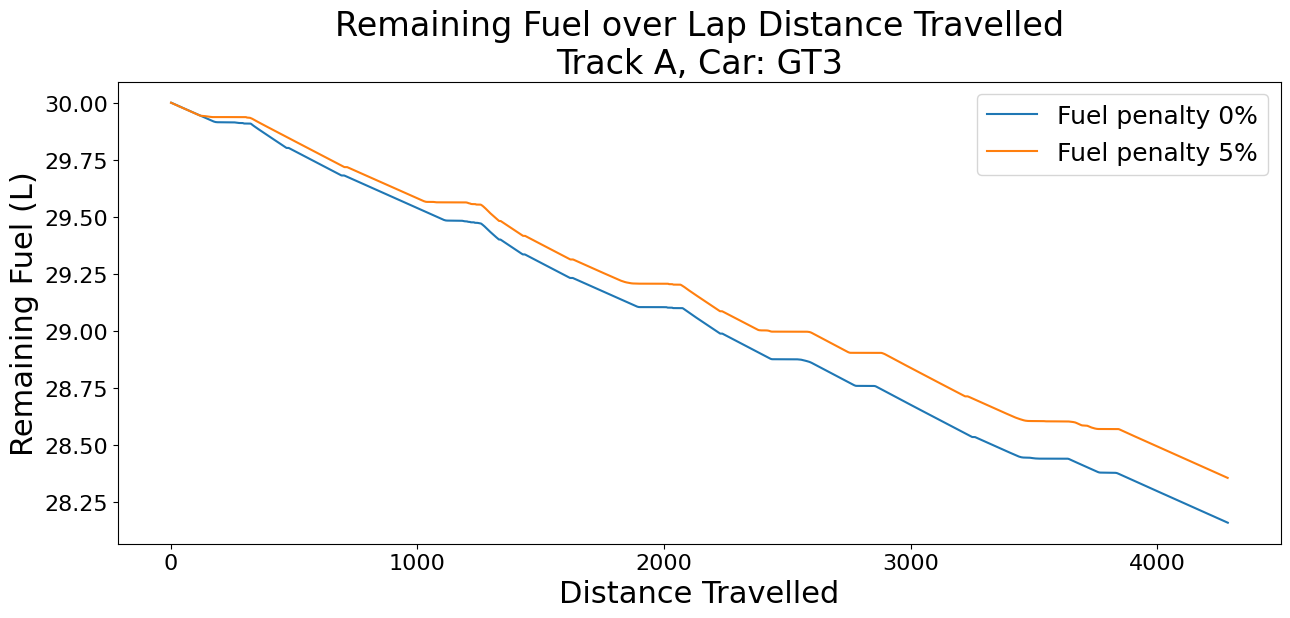

In [21]:
plt.figure(figsize=(15,6))

for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # read summary df
        summary_df = pd.read_csv(att['eval_summary'])

        # Find columns with lap times
        lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        # Compute the best lap time per episode (min across all lap columns)
        best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
        best_lap_index = int(best_lap_column.values[0].split('_')[1])

        # Filter only the fastest lap
        lap_df = episode_df[episode_df['LapCount'] == best_lap_index]

        fuel = lap_df['fuel'].values.copy()
        corrected_fuel = [fuel[0]]
        for i in range(1, len(fuel)):
            delta = fuel[i] - fuel[i-1]
            corrected_step = corrected_fuel[-1] + delta * 10  # undo the *0.1 scaling
            corrected_fuel.append(corrected_step)
        lap_df['fuel'] = corrected_fuel
        remaining_fuel_values = lap_df['fuel'] + (episode_df['fuel'].iat[0] - lap_df['fuel'].iat[0])

        plt.plot(lap_df['LapDist'].values[:-1], remaining_fuel_values.values[:-1], label=testing_info['fuel_penalty'], color=testing_info['graph_color'])


plt.xlabel('Distance Travelled')
plt.ylabel('Remaining Fuel (L)')
plt.title('Remaining Fuel over Lap Distance Travelled\nTrack A, Car: GT3')
plt.legend()
plt.show()

## Where did the model actually save time?

C:\Users\tetre\AppData\Local\Temp\ipykernel_28296\3962952795.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_df['fuel'] = corrected_fuel
C:\Users\tetre\AppData\Local\Temp\ipykernel_28296\3962952795.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_df['fuel'] = corrected_fuel


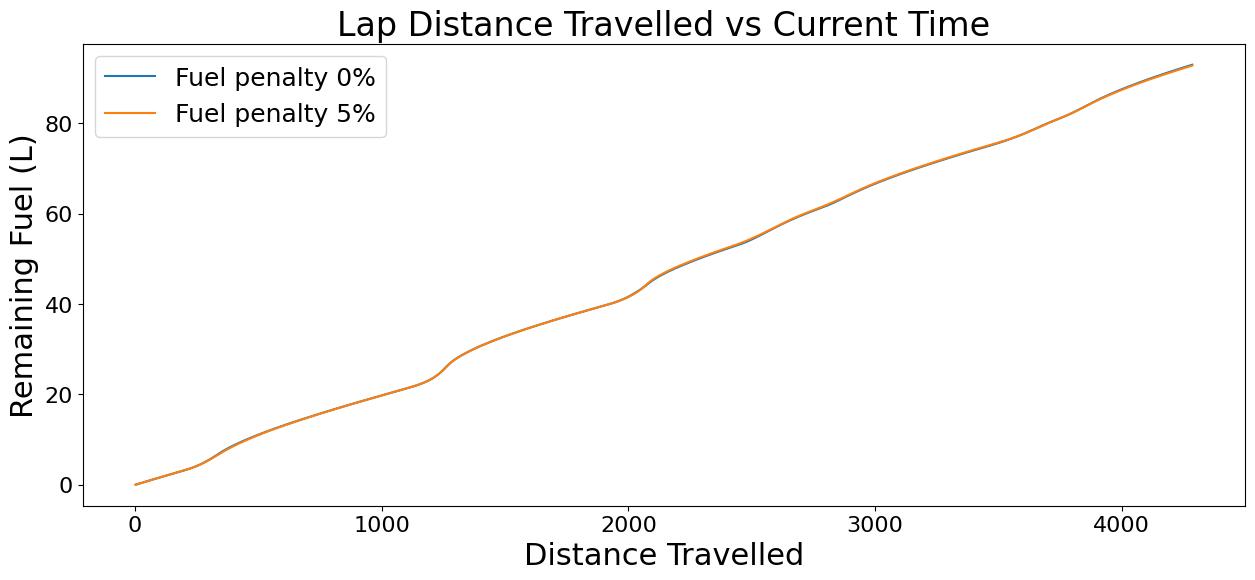

In [22]:
plt.figure(figsize=(15,6))

for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # read summary df
        summary_df = pd.read_csv(att['eval_summary'])

        # Find columns with lap times
        lap_time_cols = [col for col in summary_df.columns if re.match(r'LapNo_[1-9]\d*_Time', col)]
        if not lap_time_cols:
            print(f"No lap time columns found in {testing_key}")
            continue

        # Compute the best lap time per episode (min across all lap columns)
        best_lap_column = summary_df[lap_time_cols].replace(0, np.nan).idxmin(axis=1)
        best_lap_index = int(best_lap_column.values[0].split('_')[1])

        # Filter only the fastest lap
        lap_df = episode_df[episode_df['LapCount'] == best_lap_index]

        fuel = lap_df['fuel'].values.copy()
        corrected_fuel = [fuel[0]]
        for i in range(1, len(fuel)):
            delta = fuel[i] - fuel[i-1]
            corrected_step = corrected_fuel[-1] + delta * 10  # undo the *0.1 scaling
            corrected_fuel.append(corrected_step)
        lap_df['fuel'] = corrected_fuel
        remaining_fuel_values = lap_df['fuel'] + (episode_df['fuel'].iat[0] - lap_df['fuel'].iat[0])

        plt.plot(lap_df['LapDist'].values[:-1], lap_df['currentTime'][:-1], label=testing_info['fuel_penalty'], color=testing_info['graph_color'])


plt.xlabel('Distance Travelled')
plt.ylabel('Remaining Fuel (L)')
plt.title('Lap Distance Travelled vs Current Time')
plt.legend()
plt.show()

# Analyzing Relationships With Delta Fuel

c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


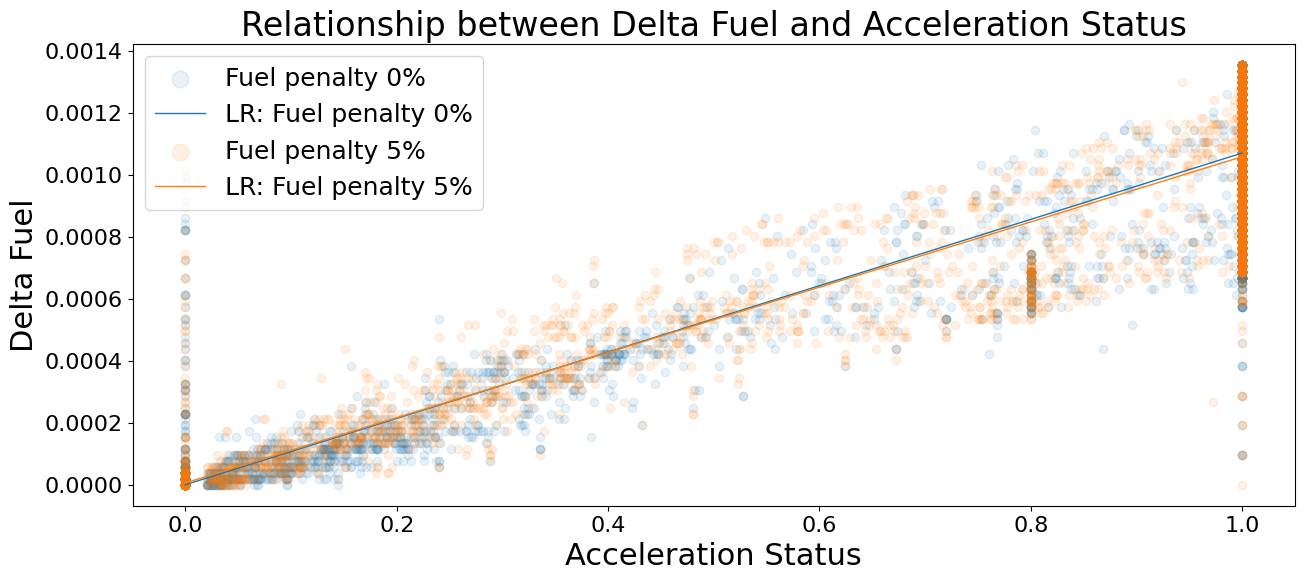

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np
import glob
import os

plt.figure(figsize=(15,6))
linewidth = 1
sample_frac = 1
scatter_alpha = 0.1


for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)
        
        # Add delta_fuel
        episode_df['delta_fuel'] =  (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna()
        
        # Fit linear regression
        model = LinearRegression().fit(episode_df[['accStatus']], episode_df[['delta_fuel']])

        # Predict values for plotting the regression line
        x_vals = np.linspace(0, 1, 100).reshape(-1, 1)
        y_vals = model.predict(x_vals)

        df_sampled = episode_df.sample(frac=sample_frac)
        plt.scatter(df_sampled['accStatus'], df_sampled['delta_fuel'], alpha=0.1, label=f"{testing_info['fuel_penalty']}")

        # Plot regression lines
        plt.plot(x_vals, y_vals, label=f"LR: {testing_info['fuel_penalty']}", linewidth=linewidth)

plt.xlabel('Acceleration Status')
plt.ylabel('Delta Fuel')
plt.title('Relationship between Delta Fuel and Acceleration Status')
plt.legend(loc='upper left')
plt.show()

c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


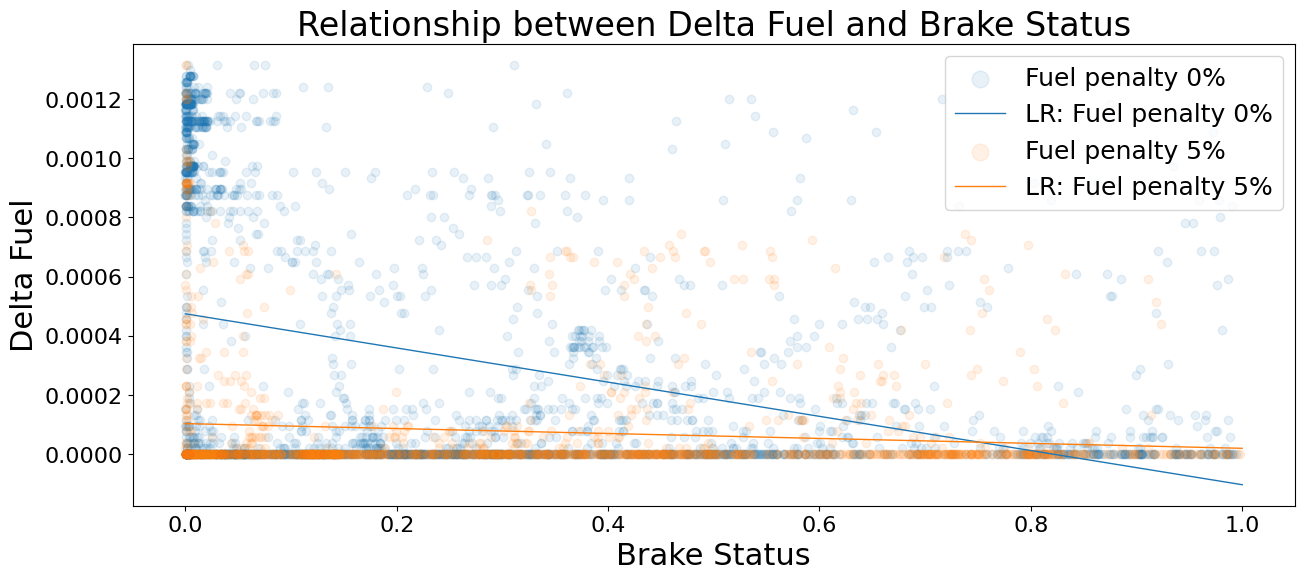

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np
import glob
import os

plt.figure(figsize=(15,6))
linewidth = 1
sample_frac = 1
scatter_alpha = 0.1


for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)
        
        # Add delta_fuel
        episode_df['delta_fuel'] =  (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna()
        
        # Fit linear regression
        episode_df = episode_df[(episode_df['brakeStatus'] > 0) & (episode_df['brakeStatus'] < 1)]
        model = LinearRegression().fit(episode_df[['brakeStatus']], episode_df[['delta_fuel']])

        # Predict values for plotting the regression line
        x_vals = np.linspace(0, 1, 100).reshape(-1, 1)
        y_vals = model.predict(x_vals)

        df_sampled = episode_df.sample(frac=sample_frac)
        plt.scatter(df_sampled['brakeStatus'], df_sampled['delta_fuel'], alpha=0.1, label=f"{testing_info['fuel_penalty']}")

        # Plot regression lines
        plt.plot(x_vals, y_vals, label=f"LR: {testing_info['fuel_penalty']}", linewidth=linewidth)
        plt.legend()

plt.xlabel('Brake Status')
plt.ylabel('Delta Fuel')
plt.title('Relationship between Delta Fuel and Brake Status')
plt.legend()
plt.show()

c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Index(['steps', 'currentTime', 'done', 'LapInvalidated', 'speed', 'reward',
       'gap', 'fuel', 'world_position_y', 'world_position_x', 'RPM',
       'steerAngle', 'brakeStatus', 'accStatus', 'actualGear', 'packetId',
       'velocity_x', 'velocity_y', 'velocity_z', 'yaw', 'roll',
       'angular_velocity_y', 'angular_velocity_x', 'LapCount', 'LapDist',
       'going_backwards', 'current_action_abs_0', 'current_action_abs_1',
       'current_action_abs_2', 'actions_0', 'actions_1', 'actions_2',
       'rl_point', 'out_of_track', 'delta_fuel', 'steerAngleAmplitude'],
      dtype='object')
Index(['steps', 'currentTime', 'done', 'LapInvalidated', 'speed', 'reward',
       'gap', 'fuel', 'world_position_y', 'world_position_x', 'RPM',
       'steerAngle', 'brakeStatus', 'accStatus', 'actualGear', 'packetId',
       'velocity_x', 'velocity_y', 'velocity_z', 'yaw', 'roll',
       'angular_velocity_y', 'angular_velocity_x', 'LapCount', 'LapDist',
       'going_backwards', 'current_action_abs

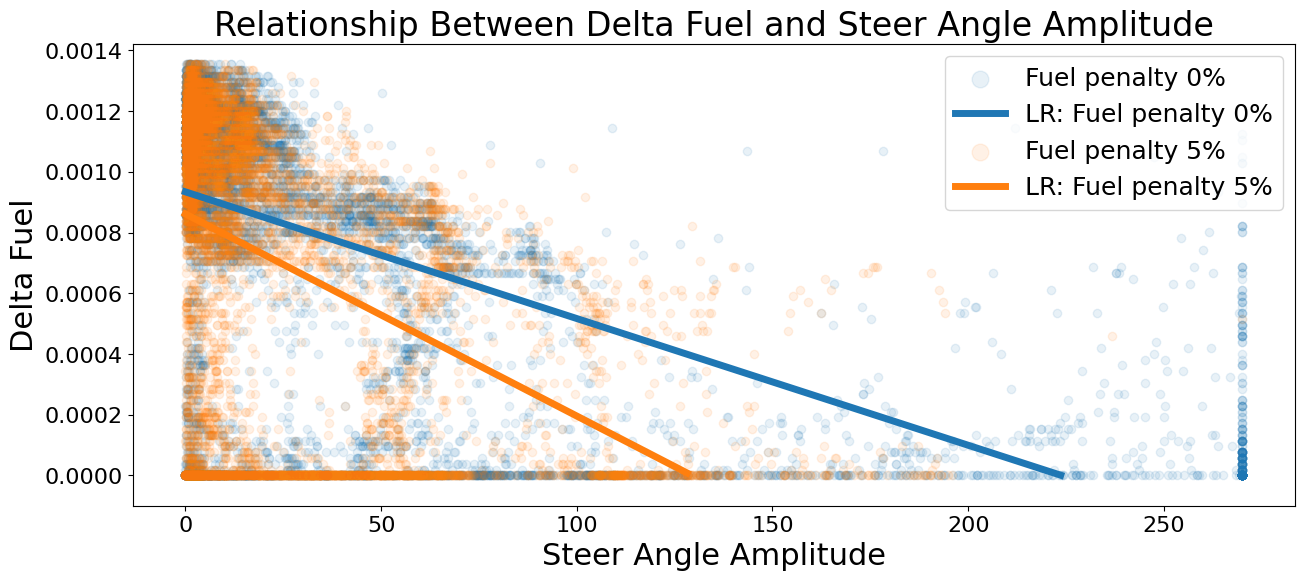

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np
import glob
import os

plt.figure(figsize=(15,6))
linewidth = 5
sample_frac = 1
scatter_alpha = 0.1


for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)
        
        # Add delta_fuel
        episode_df['delta_fuel'] =  (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna()
        episode_df['steerAngleAmplitude'] = np.abs(episode_df['steerAngle'])
        
        # Fit linear regression
        model = LinearRegression().fit(episode_df[['steerAngleAmplitude']], episode_df[['delta_fuel']])

        # Predict values for plotting the regression line
        x_min = episode_df['steerAngleAmplitude'].min()
        x_max = episode_df['steerAngleAmplitude'].max()
        x_vals = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_vals = model.predict(x_vals)

        df_sampled = episode_df.sample(frac=sample_frac)
        plt.scatter(df_sampled['steerAngleAmplitude'], df_sampled['delta_fuel'], alpha=0.1, label=f"{testing_info['fuel_penalty']}")

        # Plot regression lines
        plt.plot(x_vals[y_vals > 0], y_vals[y_vals > 0], label=f"LR: {testing_info['fuel_penalty']}", linewidth=linewidth)
        plt.legend()
        print(episode_df.columns)

plt.xlabel('Steer Angle Amplitude')
plt.ylabel('Delta Fuel')
plt.title('Relationship Between Delta Fuel and Steer Angle Amplitude')
plt.legend(loc='upper right')
plt.ylim(bottom=-0.0001)
plt.show()

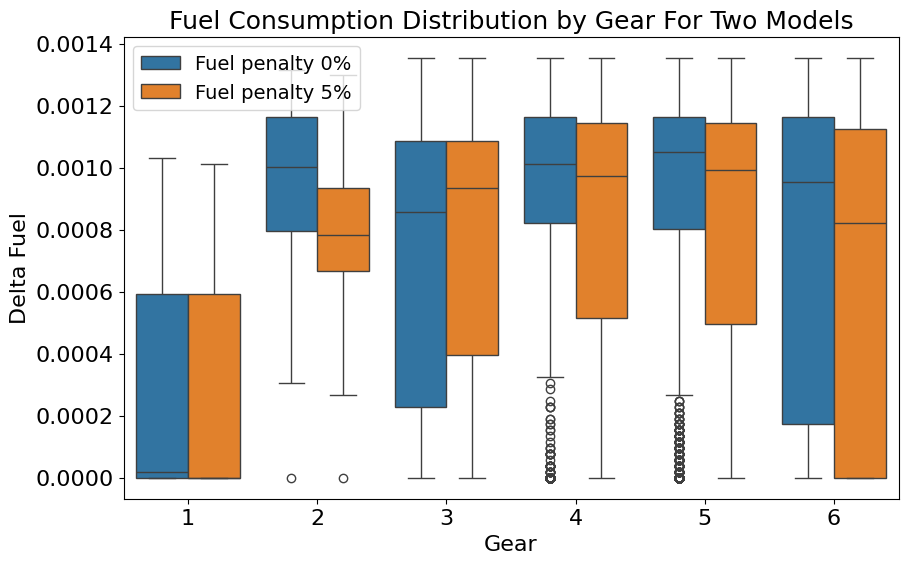

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

# List to collect DataFrames from each attempt
all_attempts_data = []

for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):  # take only the first attempt
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)
        
        # Add delta_fuel and drop rows with NaN values
        episode_df['delta_fuel'] = (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna(subset=['delta_fuel'])
        
        # Add a column to indicate which attempt this data comes from
        episode_df['attempt'] = testing_info['fuel_penalty']
        
        # Append this DataFrame to our list
        all_attempts_data.append(episode_df)

# Combine all attempts into one DataFrame
combined_df = pd.concat(all_attempts_data, ignore_index=True)

# Plot a single box-and-whisker plot with hue for attempt
plt.figure(figsize=(10, 6))
sns.boxplot(x='actualGear', y='delta_fuel', hue='attempt', data=combined_df)

plt.title("Fuel Consumption Distribution by Gear For Two Models", fontsize=18)
plt.xlabel("Gear", fontsize=16)
plt.ylabel("Delta Fuel", fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.show()

#combined_df.groupby(['actualGear', 'delta_fuel'])[combined_df['actualGear' == 1]].count()


In [27]:
import pandas as pd
import glob
import os

# List to collect results
results = []

# Iterate through test runs
for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):  # Only first attempt
        # Read episode file
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # Add delta fuel
        episode_df['delta_fuel'] = (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna(subset=['delta_fuel'])

        # Add fuel penalty as model label
        model_label = f"{testing_info['fuel_penalty']}%"

        # Group by gear
        grouped = episode_df.groupby('actualGear')['delta_fuel']

        for gear, values in grouped:
            n_samples = len(values)
            mean = values.mean()
            std = values.std()

            results.append({
                'Model': model_label,
                'Gear': f"Gear {int(gear)}",
                'n_samples': n_samples,
                'Mean': f"{mean:.2e}",
                'Std': f"{std:.2e}",
            })

# Convert to DataFrame
stats_df = pd.DataFrame(results)

# Optionally sort by gear for readability
stats_df = stats_df.sort_values(by=['Gear', 'Model'])

# Display the table
print(stats_df.to_string(index=False))


           Model   Gear  n_samples     Mean      Std
Fuel penalty 0%% Gear 1        224 2.73e-04 3.14e-04
Fuel penalty 5%% Gear 1        204 2.60e-04 3.04e-04
Fuel penalty 0%% Gear 2         84 9.59e-04 2.53e-04
Fuel penalty 5%% Gear 2         88 7.87e-04 2.00e-04
Fuel penalty 0%% Gear 3        451 7.17e-04 4.40e-04
Fuel penalty 5%% Gear 3        424 7.40e-04 4.45e-04
Fuel penalty 0%% Gear 4       1430 8.78e-04 4.09e-04
Fuel penalty 5%% Gear 4       1189 7.96e-04 4.54e-04
Fuel penalty 0%% Gear 5       3274 8.51e-04 4.46e-04
Fuel penalty 5%% Gear 5       3564 7.96e-04 4.60e-04
Fuel penalty 0%% Gear 6       4284 7.68e-04 4.82e-04
Fuel penalty 5%% Gear 6       4266 6.49e-04 5.06e-04


In [28]:
import pandas as pd
import glob
import os
from scipy.stats import mannwhitneyu

# Collect all episode data
all_attempts_data = []

for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):  # First attempt only
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)

        # Compute delta fuel
        episode_df['delta_fuel'] = (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna(subset=['delta_fuel'])

        # Label attempt
        episode_df['Model'] = f"{testing_info['fuel_penalty']}"

        all_attempts_data.append(episode_df)

# Combine into one DataFrame
combined_df = pd.concat(all_attempts_data, ignore_index=True)

# Initialize results
results = []

# Loop through each gear
for gear in sorted(combined_df['actualGear'].dropna().unique()):
    gear_df = combined_df[combined_df['actualGear'] == gear]

    # Group by model
    models = gear_df['Model'].unique()
    if len(models) < 2:
        continue  # Skip if not enough models for comparison

    model_groups = {
        model: gear_df[gear_df['Model'] == model]['delta_fuel']
        for model in models
    }

    # Try computing p-value between the first two models
    model_1, model_2 = models[:2]
    try:
        stat, p_value = mannwhitneyu(model_groups[model_1], model_groups[model_2], alternative='two-sided')
    except Exception as e:
        p_value = None

    for model in models:
        values = model_groups[model]
        results.append({
            'Model': model,
            'Gear': f"Gear {int(gear)}",
            'n_samples': len(values),
            'Mean': f"{values.mean():.2e}",
            'Std': f"{values.std():.2e}",
            'p-value': f"{p_value:.2f}" if model == model_1 else ""
        })

# Final DataFrame
stats_df = pd.DataFrame(results)
stats_df = stats_df.sort_values(by=['Gear', 'Model'])

# Show table
print(stats_df.to_string(index=False))


          Model   Gear  n_samples     Mean      Std p-value
Fuel penalty 0% Gear 1        224 2.73e-04 3.14e-04    0.68
Fuel penalty 5% Gear 1        204 2.60e-04 3.04e-04        
Fuel penalty 0% Gear 2         84 9.59e-04 2.53e-04    0.00
Fuel penalty 5% Gear 2         88 7.87e-04 2.00e-04        
Fuel penalty 0% Gear 3        451 7.17e-04 4.40e-04    0.69
Fuel penalty 5% Gear 3        424 7.40e-04 4.45e-04        
Fuel penalty 0% Gear 4       1430 8.78e-04 4.09e-04    0.00
Fuel penalty 5% Gear 4       1189 7.96e-04 4.54e-04        
Fuel penalty 0% Gear 5       3274 8.51e-04 4.46e-04    0.00
Fuel penalty 5% Gear 5       3564 7.96e-04 4.60e-04        
Fuel penalty 0% Gear 6       4284 7.68e-04 4.82e-04    0.00
Fuel penalty 5% Gear 6       4266 6.49e-04 5.06e-04        


c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


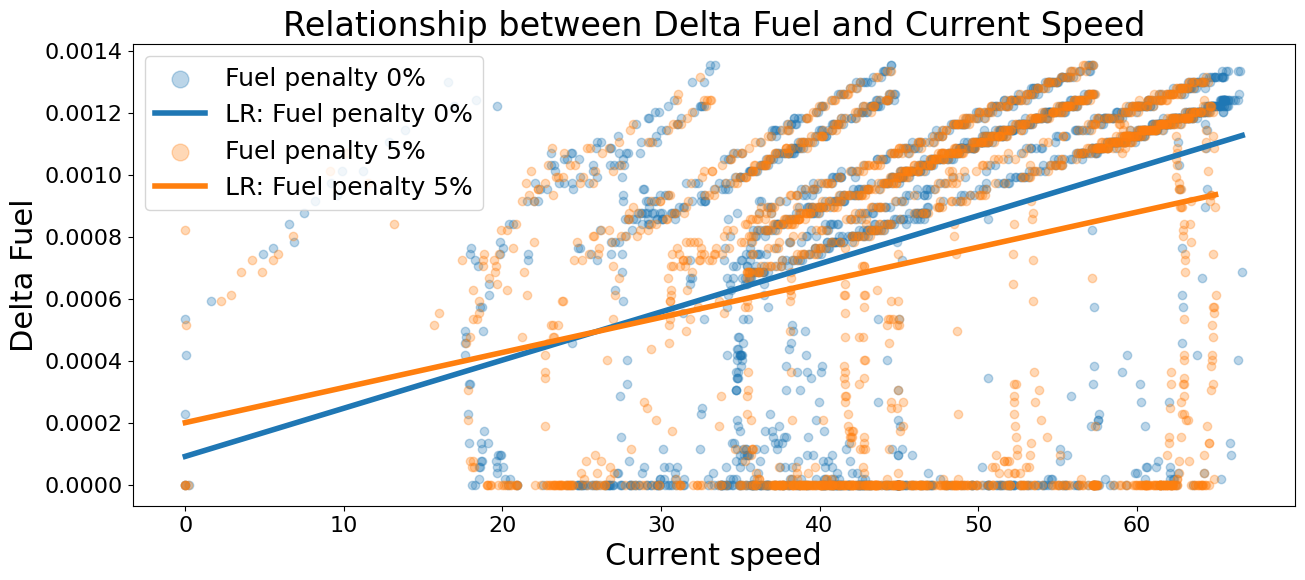

In [29]:
plt.figure(figsize=(15,6))
linewidth = 4
sample_frac = 0.2
scatter_alpha = 0.3


for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)
        
        # Add delta_fuel
        episode_df['delta_fuel'] = (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna()
        
        # Fit linear regression
        model = LinearRegression().fit(episode_df[['speed']], episode_df[['delta_fuel']])

        # Predict values for plotting the regression line
        x_vals = np.linspace(episode_df['speed'].min(), episode_df['speed'].max(), 100).reshape(-1, 1)
        y_vals = model.predict(x_vals)

        df_sampled = episode_df.sample(frac=sample_frac)
        plt.scatter(df_sampled['speed'], df_sampled['delta_fuel'], alpha=scatter_alpha, label=f"{testing_info['fuel_penalty']}")

        # Plot regression lines
        plt.plot(x_vals, y_vals, label=f"LR: {testing_info['fuel_penalty']}", linewidth=linewidth)
        plt.legend()

plt.xlabel('Current speed')
plt.ylabel('Delta Fuel')
plt.title('Relationship between Delta Fuel and Current Speed')
plt.legend()
plt.show()

c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


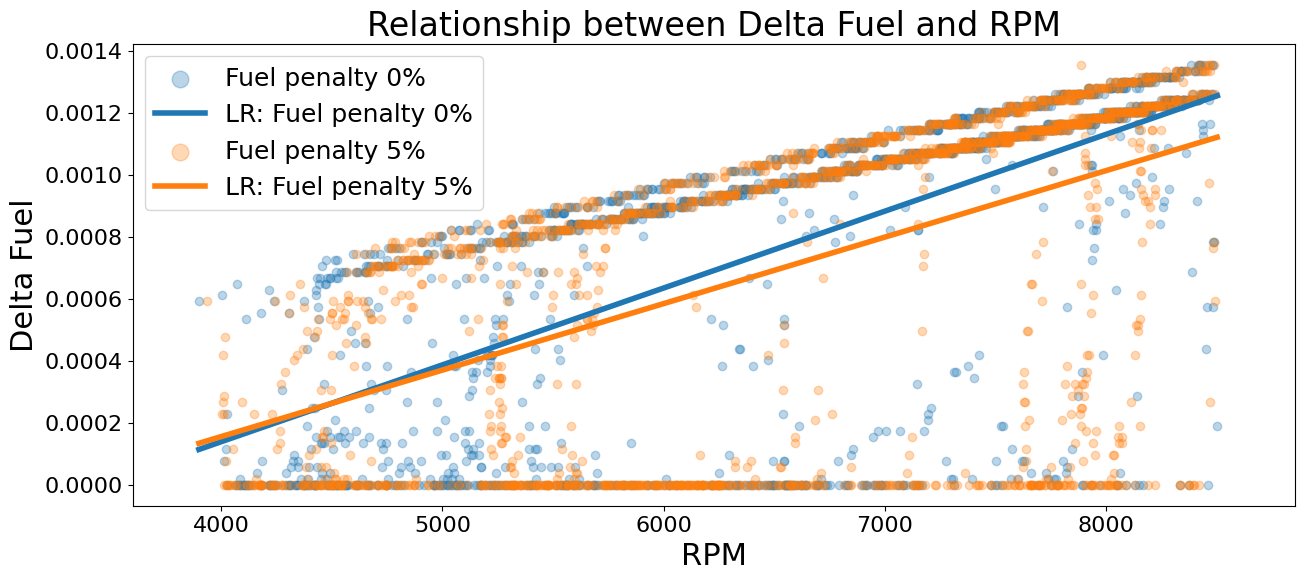

In [30]:
plt.figure(figsize=(15,6))
linewidth = 4
sample_frac = 0.2
scatter_alpha = 0.3


for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)
        
        # Add delta_fuel
        episode_df['delta_fuel'] = (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna()
        
        # Fit linear regression
        model = LinearRegression().fit(episode_df[['RPM']], episode_df[['delta_fuel']])

        # Predict values for plotting the regression line
        x_vals = np.linspace(3900, episode_df['RPM'].max(), 100).reshape(-1, 1)
        y_vals = model.predict(x_vals)

        y_vals = np.maximum(y_vals, 0)

        df_sampled = episode_df.sample(frac=sample_frac)
        plt.scatter(df_sampled['RPM'], df_sampled['delta_fuel'], alpha=scatter_alpha, label=f"{testing_info['fuel_penalty']}")

        # Plot regression lines
        plt.plot(x_vals[y_vals > 0], y_vals[y_vals > 0], label=f"LR: {testing_info['fuel_penalty']}", linewidth=linewidth)
        plt.legend()

plt.xlabel('RPM')
plt.ylabel('Delta Fuel')
plt.title('Relationship between Delta Fuel and RPM')
plt.xlim(left=3600)
plt.legend()
plt.show()

c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tetre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


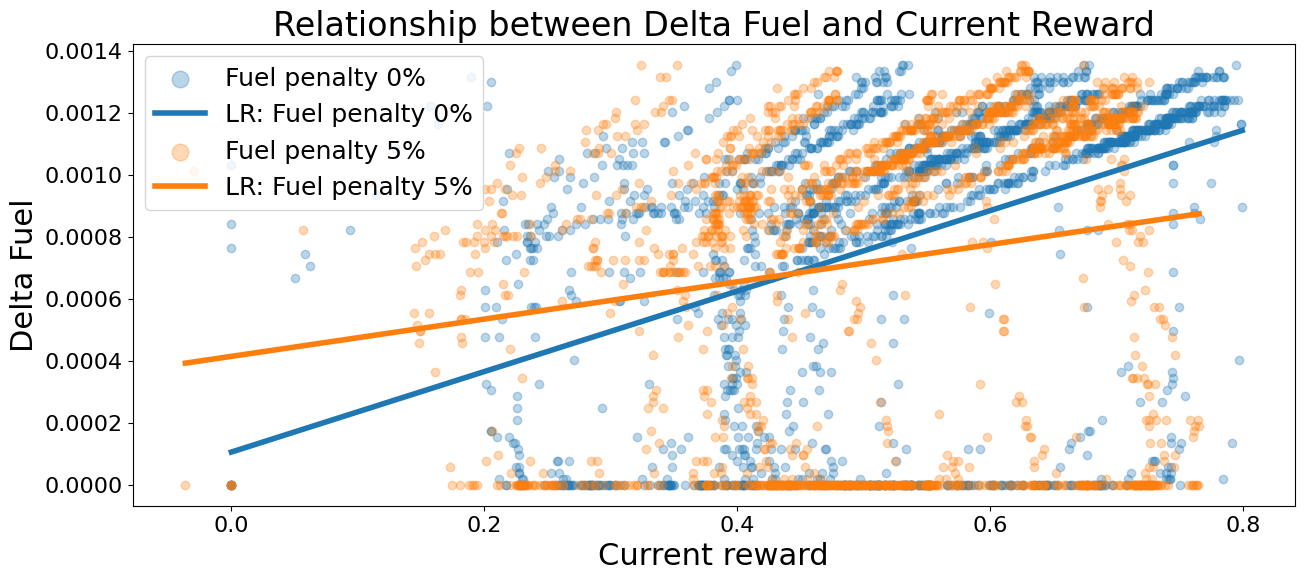

In [31]:
plt.figure(figsize=(15,6))
linewidth = 4
sample_frac = 0.2
scatter_alpha = 0.3


for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)
        
        # Add delta_fuel
        episode_df['delta_fuel'] = (episode_df['fuel'] - episode_df['fuel'].shift(-1)) * 10
        episode_df = episode_df.dropna()
        
        # Fit linear regression
        model = LinearRegression().fit(episode_df[['reward']], episode_df[['delta_fuel']])

        # Predict values for plotting the regression line
        x_vals = np.linspace(episode_df['reward'].min(), episode_df['reward'].max(), 100).reshape(-1, 1)
        y_vals = model.predict(x_vals)

        df_sampled = episode_df.sample(frac=sample_frac)
        plt.scatter(df_sampled['reward'], df_sampled['delta_fuel'], alpha=scatter_alpha, label=f"{testing_info['fuel_penalty']}")

        # Plot regression lines
        plt.plot(x_vals, y_vals, label=f"LR: {testing_info['fuel_penalty']}", linewidth=linewidth)
        plt.legend()

plt.xlabel('Current reward')
plt.ylabel('Delta Fuel')
plt.title('Relationship between Delta Fuel and Current Reward')
plt.legend()
plt.show()

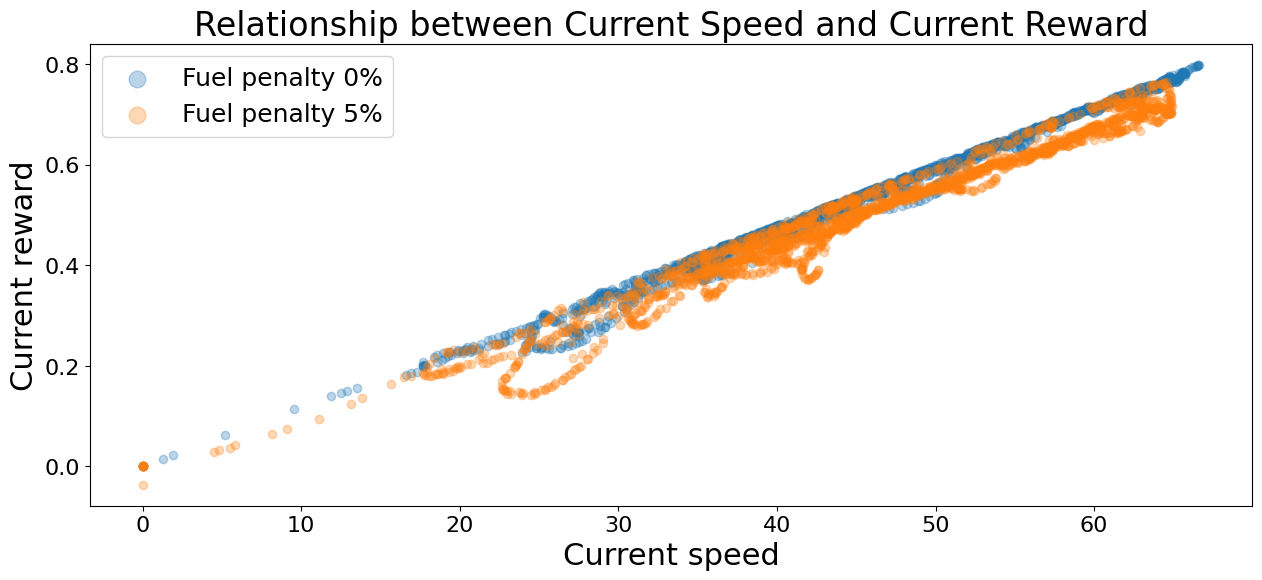

In [32]:
plt.figure(figsize=(15,6))
linewidth = 4
sample_frac = 0.2
scatter_alpha = 0.3


for testing_key, testing_info in testing_infos.items():
    for i, att in enumerate(testing_info['attempts'][:1]):
        # Read episode df (should be only one)
        csv_episode_file = glob.glob(os.path.join(att['laps'], '*.csv'))[0]
        episode_df = pd.read_csv(csv_episode_file)
        
        df_sampled = episode_df.sample(frac=sample_frac)
        plt.scatter(df_sampled['speed'], df_sampled['reward'], alpha=scatter_alpha, label=f"{testing_info['fuel_penalty']}", color=testing_info['graph_color'], marker=att['graph_markers'])

        plt.legend()

plt.xlabel('Current speed')
plt.ylabel('Current reward')
plt.title('Relationship between Current Speed and Current Reward')
plt.legend()
plt.show()